In [2]:
#importing the necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom,norm,poisson

In [3]:
df=pd.read_csv('aerofit_treadmill.csv')

In [4]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df.isna().sum() 
# there are no values missing

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
# to check in basic characteristics
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
df['Income (in K)']=round(df['Income']/1000,2)

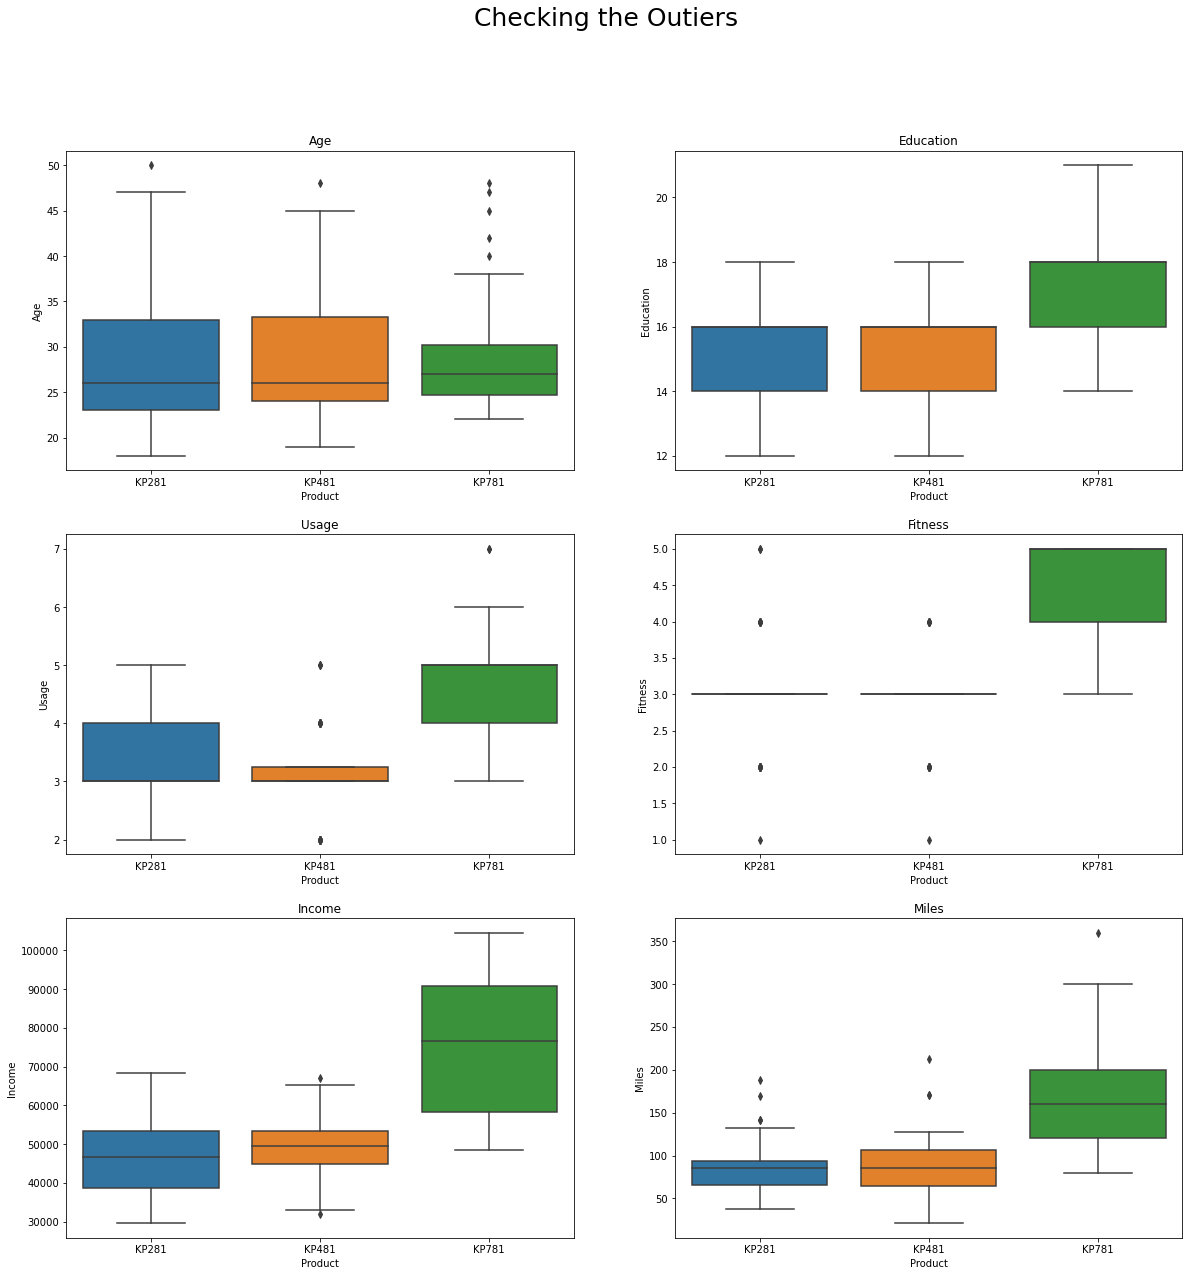

In [9]:
# detecting the outliers
fig=plt.figure(figsize=(20,20))
k=1
for i in ['Age','Education','Usage','Fitness','Income','Miles']:
    plt.subplot(3,2,k)
    sns.boxplot(data=df,y=i,x='Product')
    plt.title(i)
    k=k+1
fig.suptitle('Checking the Outiers',fontsize=25)
plt.show()

 From this data we observe that for column Education,usages, and fitness are consistent data with negligible outliers

## Product Purchased

In [10]:
# Number of products purchased 
Products=df['Product'].value_counts().reset_index()
Products

,index,Product
0,KP281,80
1,KP481,60
2,KP781,40


d:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


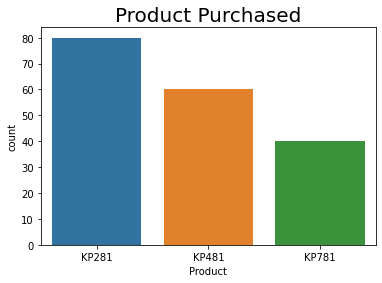

In [11]:
sns.countplot(df['Product'])
plt.title('Product Purchased',fontsize=20)
plt.show()

In [12]:
# calculating the Marginal Probability of the different products
Products['PMF']=Products['Product']/180
Products

,index,Product,PMF
0,KP281,80,0.444444
1,KP481,60,0.333333
2,KP781,40,0.222222


A. Observation- Purchased order is KP281>KP481>KP781

B. Proability of Purchasing:
- KP281=44.4%
- KP481=33.3%
- KP781=22.2%

## Product Purchased by the Gender

In [13]:
Product_Gender=pd.crosstab(df['Product'],df['Gender'],margins=True)
Product_Gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


Text(0.5, 1.0, 'Product Purchased by Gender')

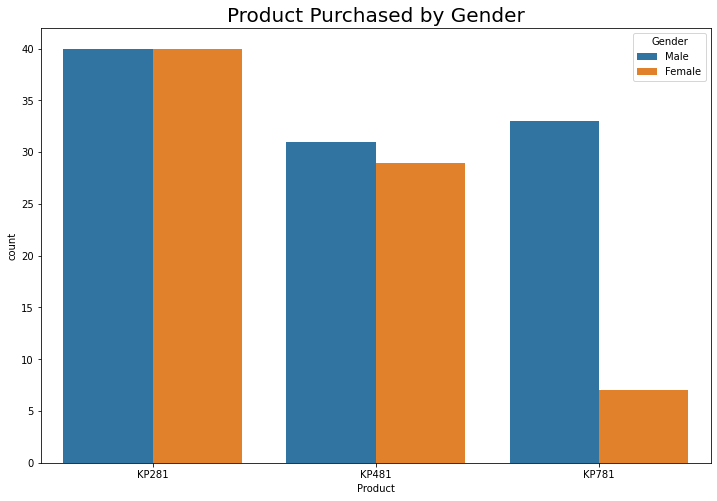

In [14]:
# plotting the countplot
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Product',hue='Gender')
plt.title('Product Purchased by Gender',fontsize=20)

In [15]:
#Getting the conditional Probability 
Product_Gender['Product|Female']=round(Product_Gender['Female']*100/76,2)
Product_Gender['Product|Male']=round(Product_Gender['Male']*100/104,2)
Product_Gender

Gender,Female,Male,All,Product|Female,Product|Male
Product,,,,,
KP281,40,40,80,52.63,38.46
KP481,29,31,60,38.16,29.81
KP781,7,33,40,9.21,31.73
All,76,104,180,100.00,100.00


In [16]:
#Calculating the Marginal Probability
Product_Gender['P(P^F)']=round(Product_Gender['Female']*100/180,2)
Product_Gender['P(P^M)']=round(Product_Gender['Male']*100/180,2)

Product_Gender

Gender,Female,Male,All,Product|Female,Product|Male,P(P^F),P(P^M)
Product,,,,,,,
KP281,40,40,80,52.63,38.46,22.22,22.22
KP481,29,31,60,38.16,29.81,16.11,17.22
KP781,7,33,40,9.21,31.73,3.89,18.33
All,76,104,180,100.00,100.00,42.22,57.78


Probability -
F=Female, M=Male
- P(KP281|F)=40/76 = 52.63% ----  P(KP281|M)=40/104 = 38.46%
<br><br>
- P(KP481|F)=29/76 = 38.16% ----  P(KP481|M)=31/104 = 29.81%
<br><br>
- P(KP781|F)=07/76 = 09.21% ----  P(KP781|M)=33/104 = 31.73%

Observation :- 

1. KP281 is more purchased, But the chances with equal amount purchase:-
   * women Buying KP281(52.63%) >>> male buying KP281(38.46%)
   <br><br>
2. KP481 is more purchased with  almost equal number of man and women but chances:-
   - women buying the KP481 (38.15%) >>> male Buying KP481(29.30%)
   <br><br>
3. KP781 is least Purchased
   - Predominately Purchased by the Males.
   - chances of Male buying the KP781 >>>> Female Buying KP781
   <br><br>
4. Chances of Buying KP781 in males are higher the Chances of Buying KP481 by males
   <br><br>

## Product Purchased on the  basis of Marital Status

In [17]:
Product_Marital=pd.crosstab(df['Product'],df['MaritalStatus'],margins=True)
Product_Marital

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


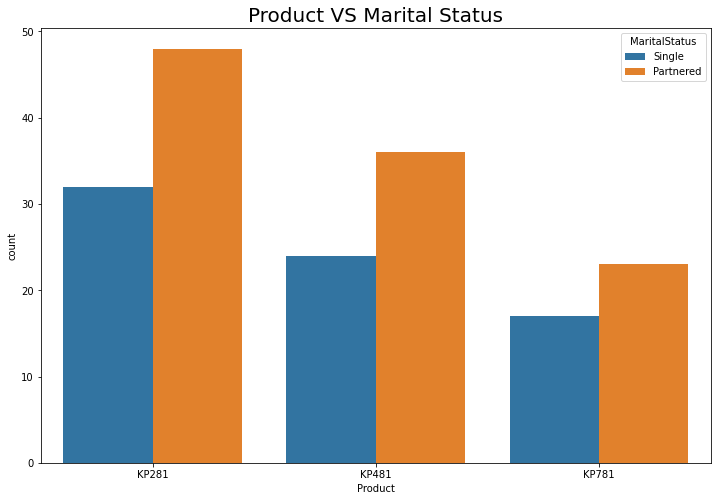

In [18]:
# PLOTTING
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Product',hue='MaritalStatus')
plt.title('Product VS Marital Status', fontsize=20)
plt.show()

In [19]:
# calculating the Conditional Probability 
Product_Marital['Product|Partnered']=round(Product_Marital['Partnered']*100/107,2)
Product_Marital['Product|Single']=round(Product_Marital['Single']*100/73,2)
Product_Marital['P(P^P)']=round(Product_Marital['Partnered']*100/180,2)
Product_Marital['P(P^S)']=round(Product_Marital['Single']*100/180,2)
Product_Marital

MaritalStatus,Partnered,Single,All,Product|Partnered,Product|Single,P(P^P),P(P^S)
Product,,,,,,,
KP281,48,32,80,44.86,43.84,26.67,17.78
KP481,36,24,60,33.64,32.88,20.00,13.33
KP781,23,17,40,21.50,23.29,12.78,9.44
All,107,73,180,100.00,100.00,59.44,40.56


observation:
KP281,KP481,KP781 is more Purchased by the Patterned customers

Probability -
S=Single, P=Partnered
- P(KP281|S) = 43.84% ----  P(KP281|P) = 44.86%
<br><br>
- P(KP481|S) = 32.88% ----  P(KP481|P) = 33.64%
<br><br>
- P(KP781|S) = 23.29% ----  P(KP781|P) = 21.50%

Observation :- 
 * Irrespective of Partnered or single there are higher chances that they will buy KP281
 * All the Product have similar chances wrt to buying by partnered or single

## Analyzing the Different Types purchased by age

In [20]:
# Extracting age and product then Classification in age category
product_age=df[['Product','Age']]
product_age['Age_category']=pd.cut(product_age['Age'],bins=[0,20,26,30,35,40,45,50],labels=['<20','21-26','25-30','30-35','35-40','40-45','45-50'])

C:\Users\Ravi Ahuja\AppData\Local\Temp\ipykernel_18916\1213120939.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_age['Age_category']=pd.cut(product_age['Age'],bins=[0,20,26,30,35,40,45,50],labels=['<20','21-26','25-30','30-35','35-40','40-45','45-50'])


In [21]:
product_age

,Product,Age,Age_category
0,KP281,18,<20
1,KP281,19,<20
2,KP281,19,<20
3,KP281,19,<20
4,KP281,20,<20
...,...,...,...
175,KP781,40,35-40
176,KP781,42,40-45
177,KP781,45,40-45
178,KP781,47,45-50


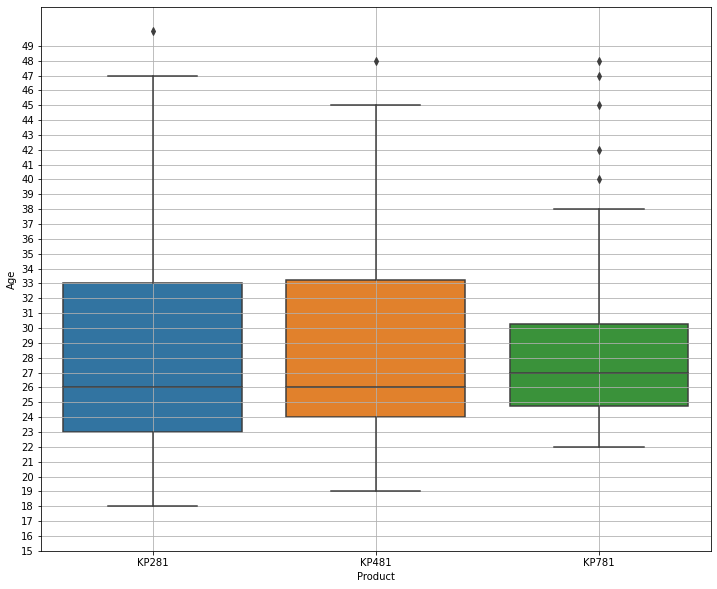

In [22]:
# Analyzing the Outliers of Age for each product
plt.figure(figsize=(12,10))
n=sns.boxplot(data=df,y=df['Age'],x='Product')
n.set_yticks(range(15,50,1))
plt.grid()
plt.show()

Outliers:-
   - KP281 - Age > 47
   - KP481 - Age > 45
   * KP781 - Age > 38 there are More outliers for KP781 Treadmill

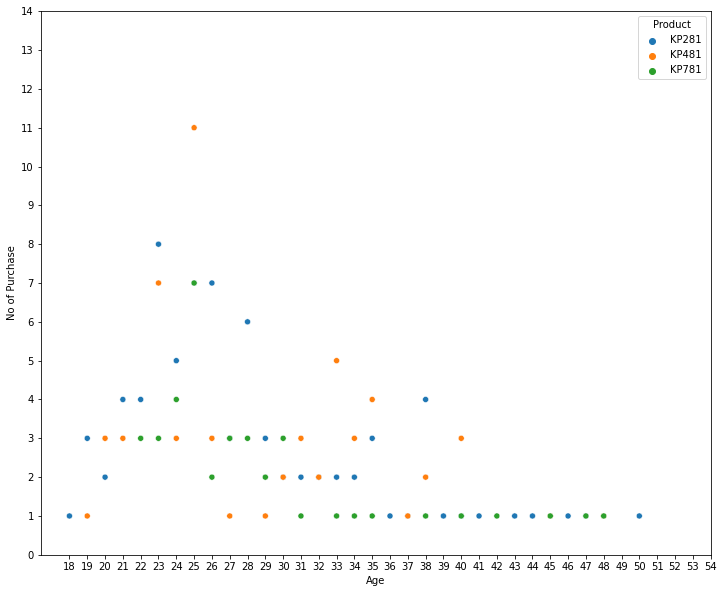

In [23]:
# we groupby the age and product then count the frequency and plotted a scatterplot
plt.figure(figsize=(12,10))
k=sns.scatterplot(data=df.groupby(['Product','Age']).size().reset_index().rename(columns={0:'values'}),
                  x='Age',y='values',hue='Product')
k.set_xticks(range(18,55,1))
k.set_yticks(range(0,15,1))
plt.ylabel('No of Purchase')
plt.show()

In [24]:
Product_age_table=pd.crosstab(product_age['Age_category'],product_age['Product'],margins=True)
Product_age_table

Product,KP281,KP481,KP781,All
Age_category,,,,
<20,6,4,0,10
21-26,35,27,19,81
25-30,14,4,11,29
30-35,11,17,4,32
35-40,8,6,2,16
40-45,3,1,2,6
45-50,3,1,2,6
All,80,60,40,180


In [25]:
# calculating the Conditional Probability 
Product_age_table['KP281|Age']=round(Product_age_table['KP281']*100/Product_age_table['All'],2)
Product_age_table['KP481|Age']=round(Product_age_table['KP481']*100/Product_age_table['All'],2)
Product_age_table['KP781|Age']=round(Product_age_table['KP781']*100/Product_age_table['All'],2)
Product_age_table


Product,KP281,KP481,KP781,All,KP281|Age,KP481|Age,KP781|Age
Age_category,,,,,,,
<20,6,4,0,10,60.00,40.00,0.00
21-26,35,27,19,81,43.21,33.33,23.46
25-30,14,4,11,29,48.28,13.79,37.93
30-35,11,17,4,32,34.38,53.12,12.50
35-40,8,6,2,16,50.00,37.50,12.50
40-45,3,1,2,6,50.00,16.67,33.33
45-50,3,1,2,6,50.00,16.67,33.33
All,80,60,40,180,44.44,33.33,22.22


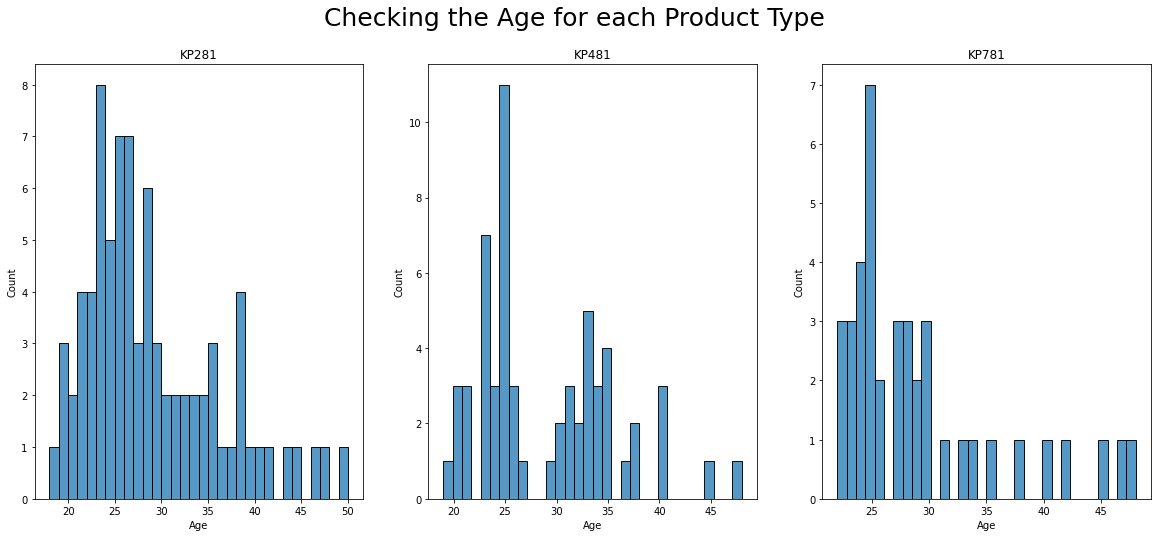

In [26]:
# plotting the histogram for each product WRT age
fig=plt.figure(figsize=(20,8))
k=1
for i in ['KP281','KP481','KP781']:
    plt.subplot(1,3,k)
    sns.histplot(df.loc[df['Product']==i]['Age'],bins=int(32))
    plt.title(i)
    k=k+1
fig.suptitle('Checking the Age for each Product Type',fontsize=25)
plt.show()


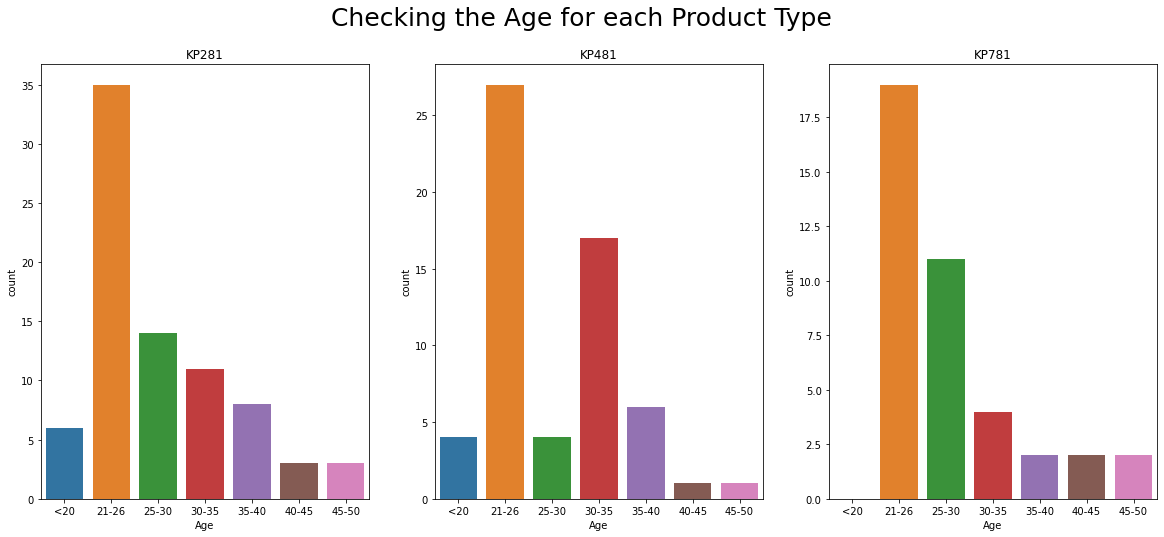

In [27]:
# plotting the Age category 
fig=plt.figure(figsize=(20,8))
k=1
for i in ['KP281','KP481','KP781']:
      bin=[0,20,26,30,35,40,45,50]
      label=['<20','21-26','25-30','30-35','35-40','40-45','45-50']
      plt.subplot(1,3,k)
      sns.countplot(x=pd.cut(df.loc[df['Product']==i]['Age'],bins=bin,labels=label))
      plt.title(i)
      k=k+1
fig.suptitle('Checking the Age for each Product Type',fontsize=25)
plt.show()


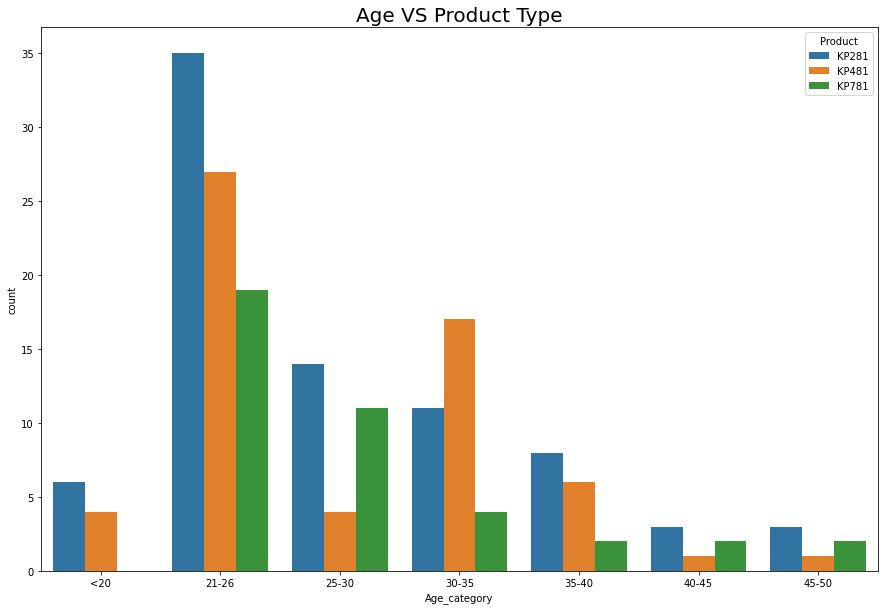

In [28]:
# Plotting the Count with age category 
plt.figure(figsize=(15,10))
sns.countplot(data=product_age,x='Age_category',hue='Product')
plt.title('Age VS Product Type',fontsize=20)
plt.show()

In [29]:
Product_age_table

Product,KP281,KP481,KP781,All,KP281|Age,KP481|Age,KP781|Age
Age_category,,,,,,,
<20,6,4,0,10,60.00,40.00,0.00
21-26,35,27,19,81,43.21,33.33,23.46
25-30,14,4,11,29,48.28,13.79,37.93
30-35,11,17,4,32,34.38,53.12,12.50
35-40,8,6,2,16,50.00,37.50,12.50
40-45,3,1,2,6,50.00,16.67,33.33
45-50,3,1,2,6,50.00,16.67,33.33
All,80,60,40,180,44.44,33.33,22.22


Observation- 
* KP281 - Customer having age in between 20-30
* KP481 - Customer having age in between 30-35
* KP781 - Customer having age in between >40(outliers),25-30


## Product analysis with Income

In [30]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income (in K)
0,KP281,18,Male,14,Single,3,4,29562,112,29.56
1,KP281,19,Male,15,Single,2,3,31836,75,31.84
2,KP281,19,Female,14,Partnered,4,3,30699,66,30.70
3,KP281,19,Male,12,Single,3,3,32973,85,32.97
4,KP281,20,Male,13,Partnered,4,2,35247,47,35.25
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,83.42
176,KP781,42,Male,18,Single,5,4,89641,200,89.64
177,KP781,45,Male,16,Single,5,5,90886,160,90.89
178,KP781,47,Male,18,Partnered,4,5,104581,120,104.58


In [31]:
#Extracting the Income and product column and defining the category income 
Product_income=df[['Product','Income (in K)']]
Product_income['Income_category']=pd.cut(Product_income['Income (in K)'],bins=[0,30,40,50,60,70,80,90,100,110],labels=['<30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110'])

C:\Users\Ravi Ahuja\AppData\Local\Temp\ipykernel_18916\510611060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Product_income['Income_category']=pd.cut(Product_income['Income (in K)'],bins=[0,30,40,50,60,70,80,90,100,110],labels=['<30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110'])


In [32]:
Product_income

,Product,Income (in K),Income_category
0,KP281,29.56,<30
1,KP281,31.84,30-40
2,KP281,30.70,30-40
3,KP281,32.97,30-40
4,KP281,35.25,30-40
...,...,...,...
175,KP781,83.42,80-90
176,KP781,89.64,80-90
177,KP781,90.89,90-100
178,KP781,104.58,100-110


In [33]:
#creating a table 
Product_income_table=pd.crosstab(Product_income['Income_category'],Product_income['Product'],margins=True)
Product_income_table

Product,KP281,KP481,KP781,All
Income_category,,,,
<30,1,0,0,1
30-40,22,9,0,31
40-50,25,21,5,51
50-60,26,23,6,55
60-70,6,7,6,19
70-80,0,0,4,4
80-90,0,0,7,7
90-100,0,0,9,9
100-110,0,0,3,3


In [34]:
# calculating the Conditional Probability 
Product_income_table['KP281|Income']=round(Product_income_table['KP281']*100/Product_income_table['All'],2)
Product_income_table['KP481|Income']=round(Product_income_table['KP481']*100/Product_income_table['All'],2)
Product_income_table['KP781|Income']=round(Product_income_table['KP781']*100/Product_income_table['All'],2)
Product_income_table


Product,KP281,KP481,KP781,All,KP281|Income,KP481|Income,KP781|Income
Income_category,,,,,,,
<30,1,0,0,1,100.00,0.00,0.00
30-40,22,9,0,31,70.97,29.03,0.00
40-50,25,21,5,51,49.02,41.18,9.80
50-60,26,23,6,55,47.27,41.82,10.91
60-70,6,7,6,19,31.58,36.84,31.58
70-80,0,0,4,4,0.00,0.00,100.00
80-90,0,0,7,7,0.00,0.00,100.00
90-100,0,0,9,9,0.00,0.00,100.00
100-110,0,0,3,3,0.00,0.00,100.00


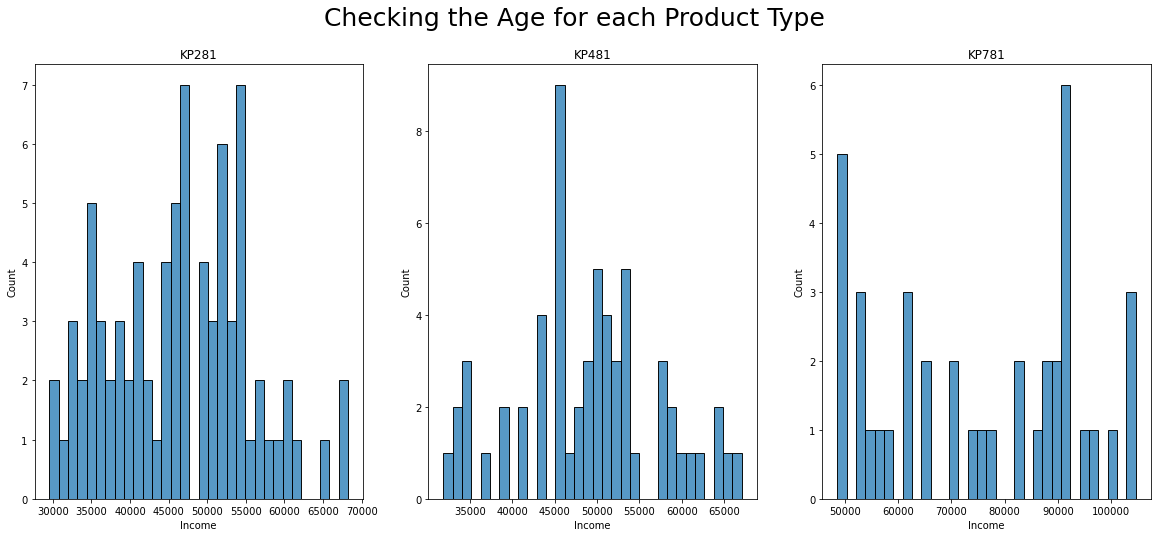

In [35]:
# plotting the histogram for each product for Income
fig=plt.figure(figsize=(20,8))
k=1
for i in ['KP281','KP481','KP781']:
    plt.subplot(1,3,k)
    sns.histplot(df.loc[df['Product']==i]['Income'],bins=int(32))
    plt.title(i)
    k=k+1
fig.suptitle('Checking the Age for each Product Type',fontsize=25)
plt.show()

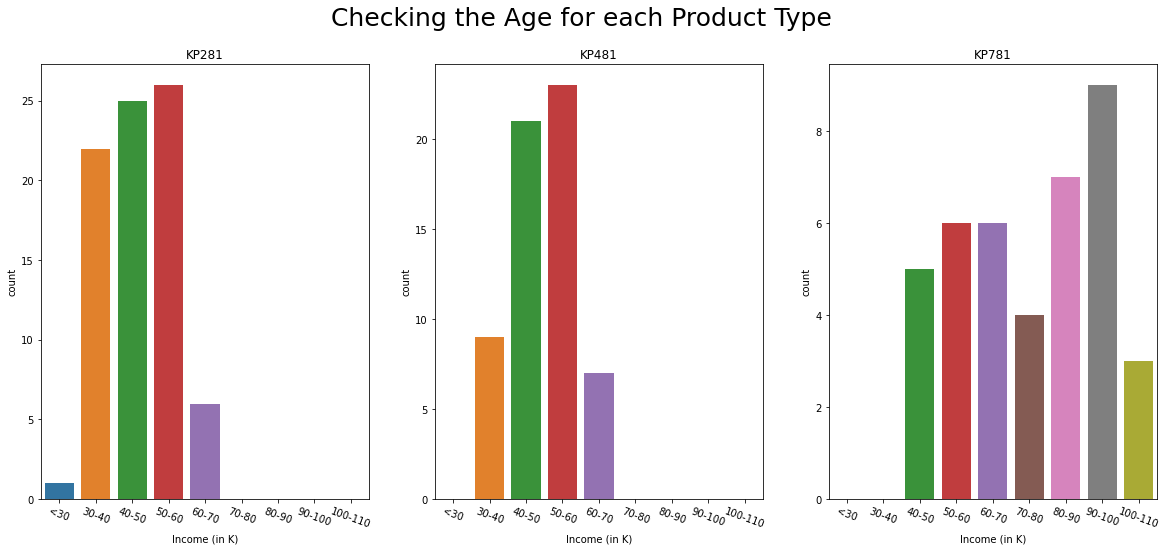

In [36]:
# plotting the Income Category
fig=plt.figure(figsize=(20,8))
k=1
for i in ['KP281','KP481','KP781']:
      bin=[0,30,40,50,60,70,80,90,100,110]
      label=['<30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','100-110']
      plt.subplot(1,3,k)
      sns.countplot(x=pd.cut(df.loc[df['Product']==i]['Income (in K)'],bins=bin,labels=label))
      plt.title(i)
      plt.xticks(rotation=340)
      k=k+1
fig.suptitle('Checking the Age for each Product Type',fontsize=25)
plt.show()


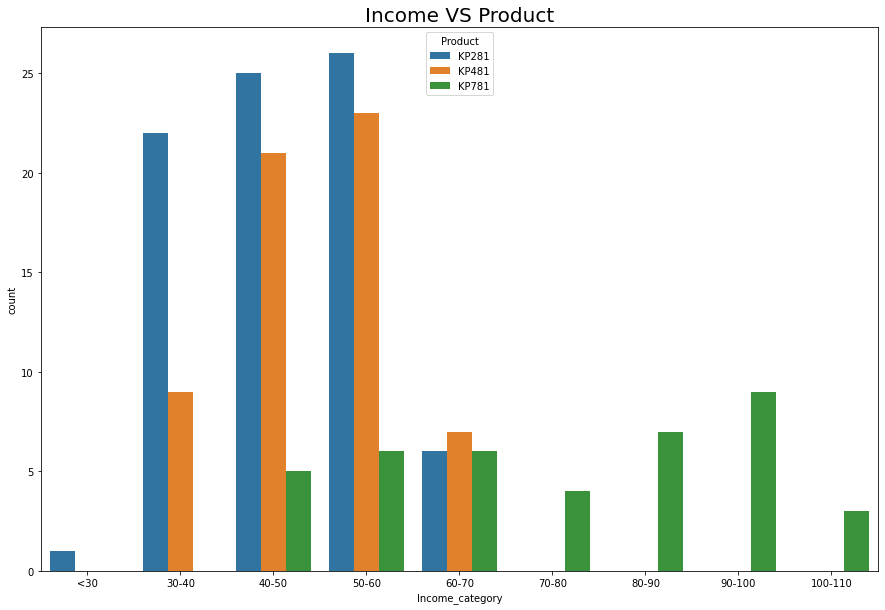

In [37]:
# Plotting the income category with the product
plt.figure(figsize=(15,10))
sns.countplot(data=Product_income,x='Income_category',hue='Product')
plt.title('Income VS Product',fontsize=20)
plt.show()

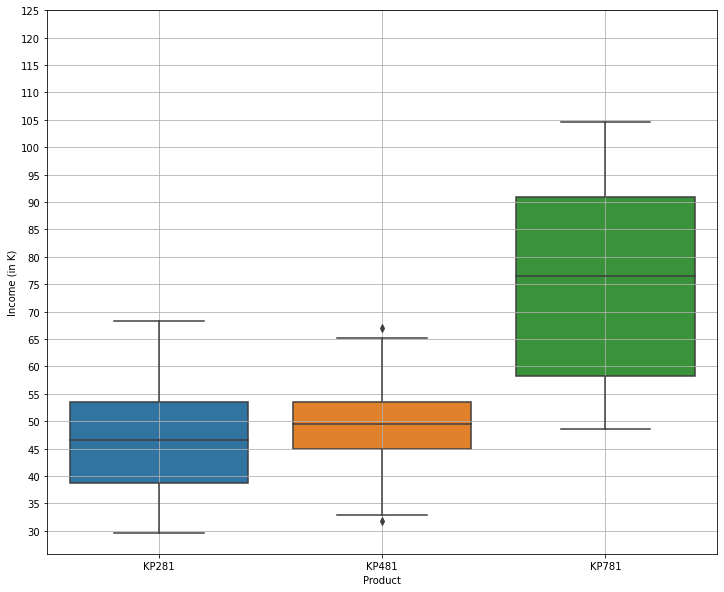

In [38]:
# Analyzing the Outliers of Income for each product
plt.figure(figsize=(12,10))
n=sns.boxplot(data=df,y=df['Income (in K)'],x='Product')
n.set_yticks(range(30,130,5))
plt.grid()
plt.show()

Outliers:-
   * KP281,KP781 there are no outliers
   * KP481- Outliers are above 60K

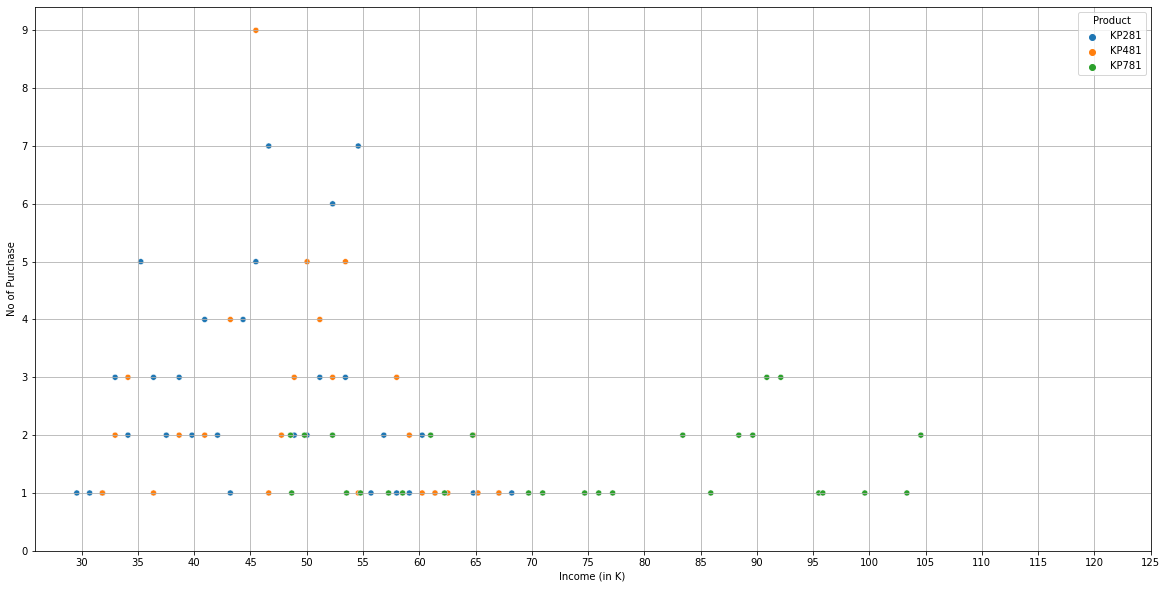

In [39]:
# we groupby the age and product then count the frequency and plotted a scatterplot
plt.figure(figsize=(20,10))
k=sns.scatterplot(data=df.groupby(['Product','Income (in K)']).size().reset_index().rename(columns={0:'values'}),
                  x='Income (in K)',y='values',hue='Product')
k.set_xticks(range(30,130,5))
k.set_yticks(range(0,10,1))
plt.ylabel('No of Purchase')
plt.grid()
plt.show()

In [40]:
Product_income_table

Product,KP281,KP481,KP781,All,KP281|Income,KP481|Income,KP781|Income
Income_category,,,,,,,
<30,1,0,0,1,100.00,0.00,0.00
30-40,22,9,0,31,70.97,29.03,0.00
40-50,25,21,5,51,49.02,41.18,9.80
50-60,26,23,6,55,47.27,41.82,10.91
60-70,6,7,6,19,31.58,36.84,31.58
70-80,0,0,4,4,0.00,0.00,100.00
80-90,0,0,7,7,0.00,0.00,100.00
90-100,0,0,9,9,0.00,0.00,100.00
100-110,0,0,3,3,0.00,0.00,100.00


Observation-
1. KP281- customer having Income in between 30k-60k
2. KP481- customer having Income in between 40k-60k
3. KP781- customer having Income in greater > 60k

## Analyzation of Product with Education 


In [41]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income (in K)
0,KP281,18,Male,14,Single,3,4,29562,112,29.56
1,KP281,19,Male,15,Single,2,3,31836,75,31.84
2,KP281,19,Female,14,Partnered,4,3,30699,66,30.70
3,KP281,19,Male,12,Single,3,3,32973,85,32.97
4,KP281,20,Male,13,Partnered,4,2,35247,47,35.25
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,83.42
176,KP781,42,Male,18,Single,5,4,89641,200,89.64
177,KP781,45,Male,16,Single,5,5,90886,160,90.89
178,KP781,47,Male,18,Partnered,4,5,104581,120,104.58


In [42]:
# Import the sum of values with Education and Product
Prodcut_education_table=pd.crosstab(df['Education'],df['Product'],margins=True)
Prodcut_education_table

Product,KP281,KP481,KP781,All
Education,,,,
12,2,1,0,3
13,3,2,0,5
14,30,23,2,55
15,4,1,0,5
16,39,31,15,85
18,2,2,19,23
20,0,0,1,1
21,0,0,3,3
All,80,60,40,180


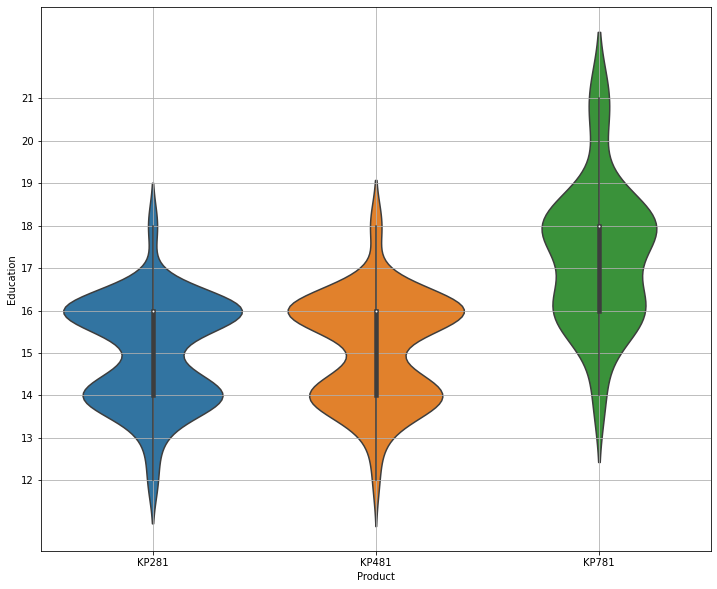

In [43]:
# Analyzing the Outliers of Education for each product
plt.figure(figsize=(12,10))
n=sns.violinplot(data=df,y=df['Education'],x='Product')
n.set_yticks(range(12,22,1))
plt.grid()
plt.show()

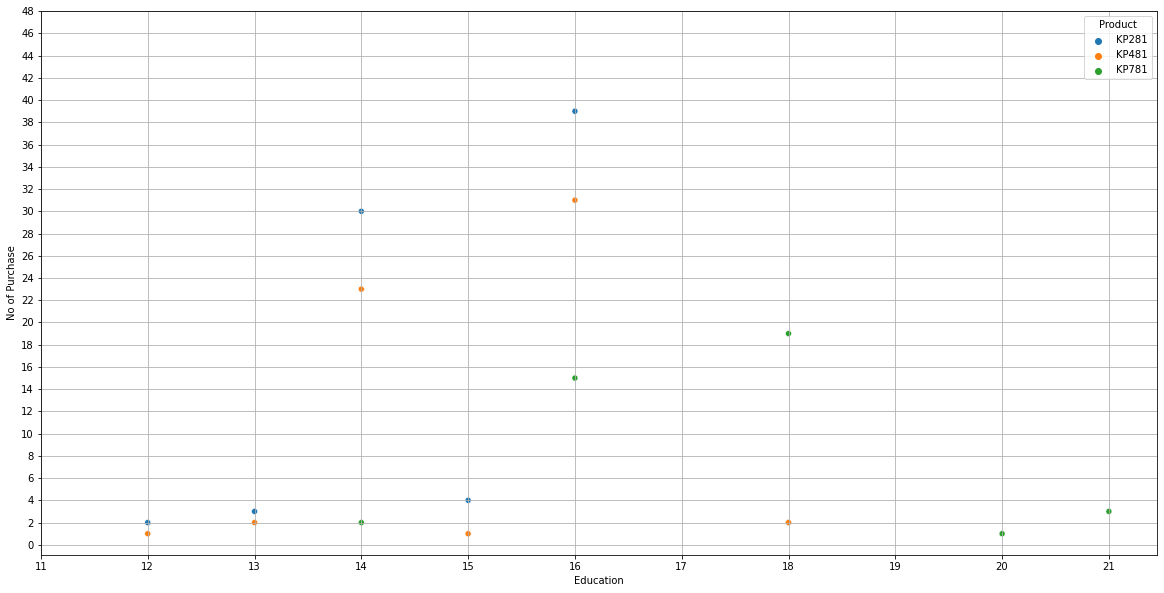

In [44]:
# we groupby the Education in years and product then count the frequency and plotted a scatterplot
plt.figure(figsize=(20,10))
k=sns.scatterplot(data=df.groupby(['Product','Education']).size().reset_index().rename(columns={0:'values'}),
                  x='Education',y='values',hue='Product')
k.set_xticks(range(11,22))
k.set_yticks(range(0,50,2))
plt.ylabel('No of Purchase')
plt.grid()
plt.show()

In [45]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [46]:
# calculating the Conditional Probability 
Prodcut_education_table['KP281|Education']=round(Prodcut_education_table['KP281']*100/Prodcut_education_table['All'],2)
Prodcut_education_table['KP481|Education']=round(Prodcut_education_table['KP481']*100/Prodcut_education_table['All'],2)
Prodcut_education_table['KP781|Education']=round(Prodcut_education_table['KP781']*100/Prodcut_education_table['All'],2)
Prodcut_education_table


Product,KP281,KP481,KP781,All,KP281|Education,KP481|Education,KP781|Education
Education,,,,,,,
12,2,1,0,3,66.67,33.33,0.00
13,3,2,0,5,60.00,40.00,0.00
14,30,23,2,55,54.55,41.82,3.64
15,4,1,0,5,80.00,20.00,0.00
16,39,31,15,85,45.88,36.47,17.65
18,2,2,19,23,8.70,8.70,82.61
20,0,0,1,1,0.00,0.00,100.00
21,0,0,3,3,0.00,0.00,100.00
All,80,60,40,180,44.44,33.33,22.22


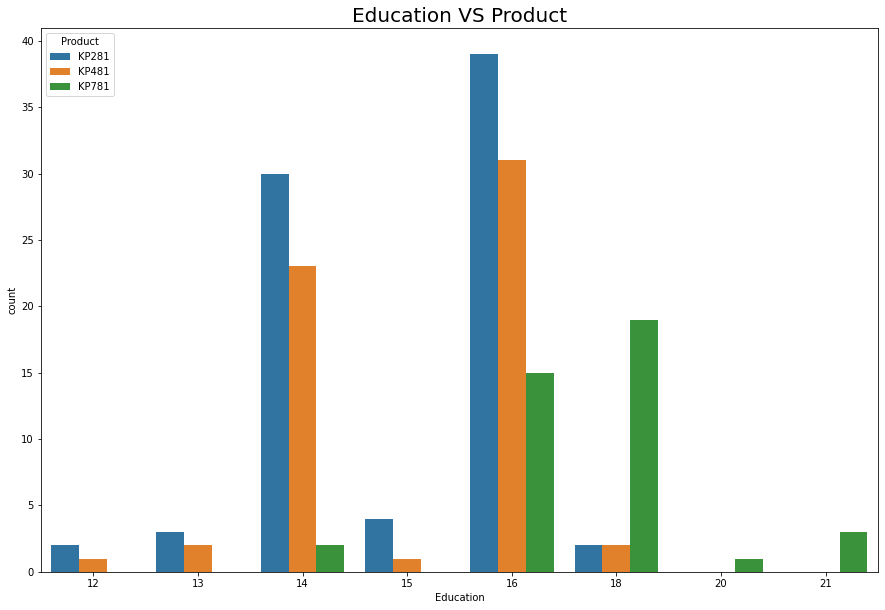

In [47]:
# Plotting the countplot with Education vs product
plt.figure(figsize=(15,10))
sns.countplot(x=df['Education'],hue=df['Product'])
plt.title('Education VS Product',fontsize=20)
plt.show()

Observation:-
1. KP281= customer having Education of 14 and 16 years
1. KP281= customer having Education of 14 and 16 years
1. KP781= customer having Education of 18 and more years

##  Analyzation of Usages with the Prodcut type

In [48]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income (in K)
0,KP281,18,Male,14,Single,3,4,29562,112,29.56
1,KP281,19,Male,15,Single,2,3,31836,75,31.84
2,KP281,19,Female,14,Partnered,4,3,30699,66,30.70
3,KP281,19,Male,12,Single,3,3,32973,85,32.97
4,KP281,20,Male,13,Partnered,4,2,35247,47,35.25
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,83.42
176,KP781,42,Male,18,Single,5,4,89641,200,89.64
177,KP781,45,Male,16,Single,5,5,90886,160,90.89
178,KP781,47,Male,18,Partnered,4,5,104581,120,104.58


In [49]:
Product_Usage_table=pd.crosstab(df['Usage'],df['Product'],margins=True)
Product_Usage_table

Product,KP281,KP481,KP781,All
Usage,,,,
2,19,14,0,33
3,37,31,1,69
4,22,12,18,52
5,2,3,12,17
6,0,0,7,7
7,0,0,2,2
All,80,60,40,180


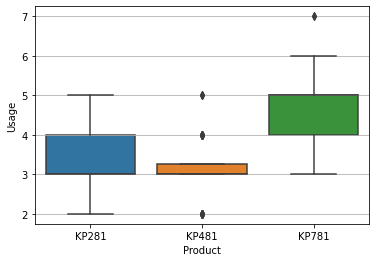

In [50]:
sns.boxplot(data=df,y='Usage',x='Product')
plt.grid(axis='y')

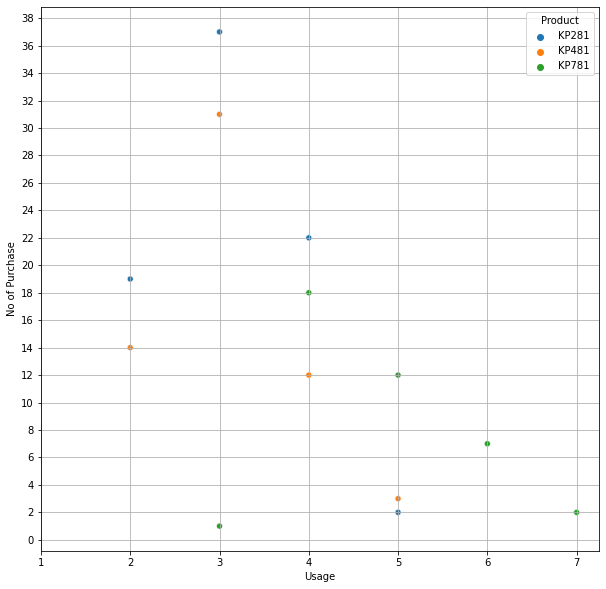

In [51]:
# we groupby the Education in years and product then count the frequency and plotted a scatterplot
plt.figure(figsize=(10,10))
k=sns.scatterplot(data=df.groupby(['Product','Usage']).size().reset_index().rename(columns={0:'values'}),
                  x='Usage',y='values',hue='Product')
k.set_xticks(range(1,8))
k.set_yticks(range(0,40,2))
plt.ylabel('No of Purchase')
plt.grid()

In [52]:
# calculating the Conditional Probability 
Product_Usage_table['KP281|Usage']=round(Product_Usage_table['KP281']*100/Product_Usage_table['All'],2)
Product_Usage_table['KP481|Usage']=round(Product_Usage_table['KP481']*100/Product_Usage_table['All'],2)
Product_Usage_table['KP781|Usage']=round(Product_Usage_table['KP781']*100/Product_Usage_table['All'],2)
Product_Usage_table


Product,KP281,KP481,KP781,All,KP281|Usage,KP481|Usage,KP781|Usage
Usage,,,,,,,
2,19,14,0,33,57.58,42.42,0.00
3,37,31,1,69,53.62,44.93,1.45
4,22,12,18,52,42.31,23.08,34.62
5,2,3,12,17,11.76,17.65,70.59
6,0,0,7,7,0.00,0.00,100.00
7,0,0,2,2,0.00,0.00,100.00
All,80,60,40,180,44.44,33.33,22.22


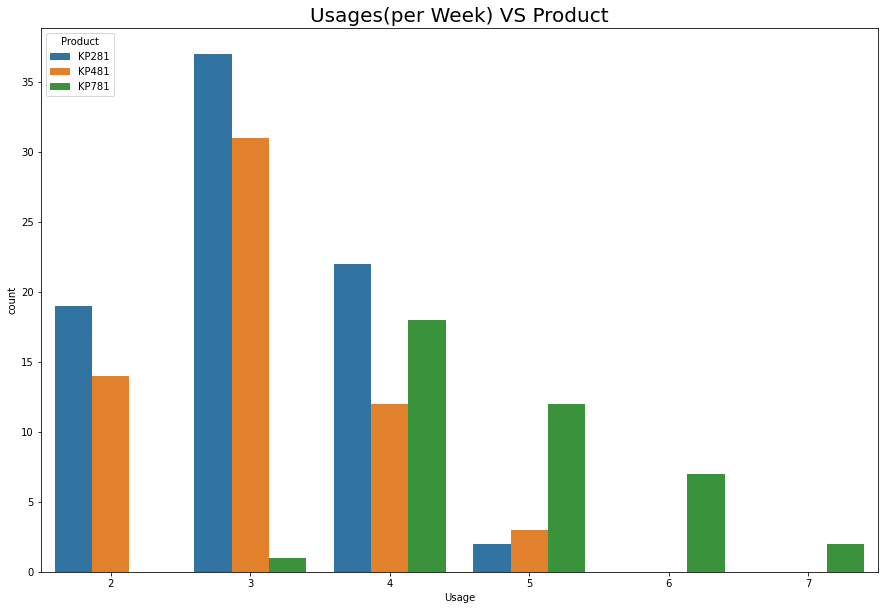

In [53]:
# Plotting the countplot of Usages(per week) with the Product type
plt.figure(figsize=(15,10))
sns.countplot(x=df['Usage'],hue=df['Product'])
plt.title('Usages(per Week) VS Product',fontsize=20)
plt.show()

Observation-:
1. KP281= more preferred for usage 2-4
1. KP481= more preferred for usage 2-3
1. KP781= more preferred for usage more than 4 

## Analyzation of Miles with Product

In [54]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income (in K)
0,KP281,18,Male,14,Single,3,4,29562,112,29.56
1,KP281,19,Male,15,Single,2,3,31836,75,31.84
2,KP281,19,Female,14,Partnered,4,3,30699,66,30.70
3,KP281,19,Male,12,Single,3,3,32973,85,32.97
4,KP281,20,Male,13,Partnered,4,2,35247,47,35.25
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,83.42
176,KP781,42,Male,18,Single,5,4,89641,200,89.64
177,KP781,45,Male,16,Single,5,5,90886,160,90.89
178,KP781,47,Male,18,Partnered,4,5,104581,120,104.58


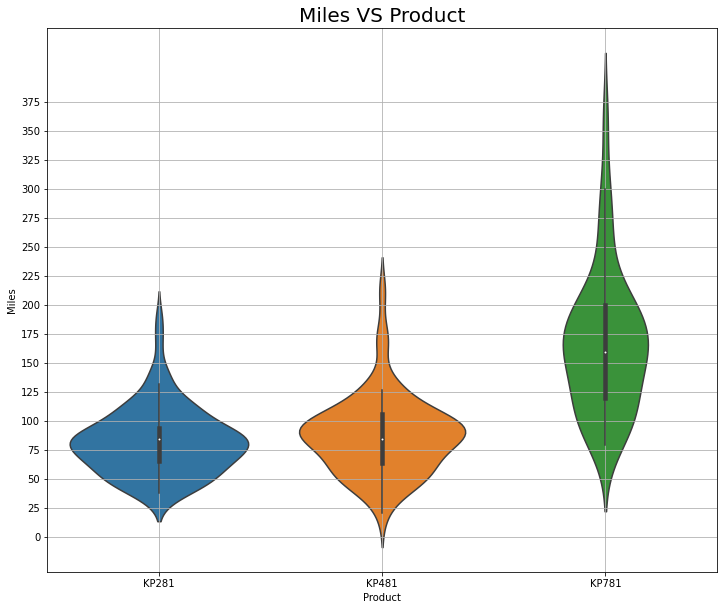

In [55]:
# Checking the outliers
plt.figure(figsize=(12,10))
g=sns.violinplot(data=df,y='Miles',x='Product')
g.set_yticks(range(0,400,25))
plt.title('Miles VS Product',fontsize=20)
plt.grid()
plt.show()

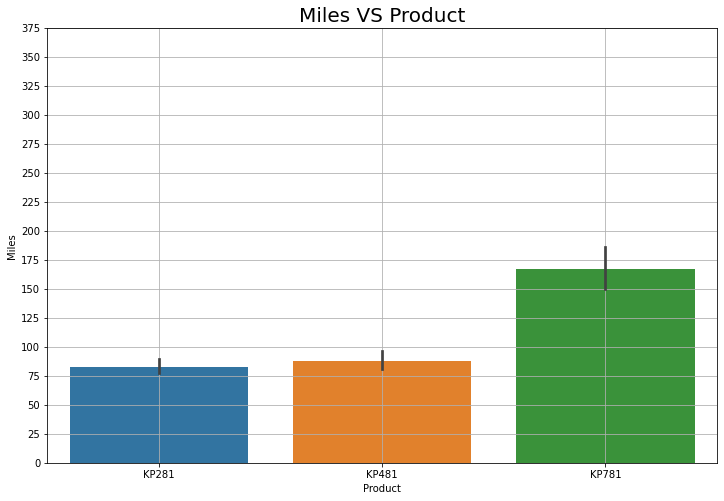

In [56]:
plt.figure(figsize=(12,8))
h=sns.barplot(data=df,y='Miles',x='Product')
h.set_yticks(range(0,400,25))
plt.title('Miles VS Product',fontsize=20)
plt.grid()
plt.show()

OUtliers- 
* KP281 = miles more than 135 is outliers
* KP481 = >125
* KP781= >300 

In [57]:
#Extracting the Miles and product column and defining the Miles categories 
Product_Miles=df[['Product','Miles']]
a=[x for x in range(0,400,25)]
b=[str(a[i])+"-"+str(a[i+1]) for i in range(0,len(a)-1)]
Product_Miles['Miles_category']=pd.cut(Product_Miles['Miles'],bins=a,labels=b)
Product_Miles

C:\Users\Ravi Ahuja\AppData\Local\Temp\ipykernel_18916\1078747982.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Product_Miles['Miles_category']=pd.cut(Product_Miles['Miles'],bins=a,labels=b)


,Product,Miles,Miles_category
0,KP281,112,100-125
1,KP281,75,50-75
2,KP281,66,50-75
3,KP281,85,75-100
4,KP281,47,25-50
...,...,...,...
175,KP781,200,175-200
176,KP781,200,175-200
177,KP781,160,150-175
178,KP781,120,100-125


In [58]:
product_miles_table=pd.crosstab(Product_Miles['Miles_category'],Product_Miles['Product'],margins=True)
product_miles_table

Product,KP281,KP481,KP781,All
Miles_category,,,,
0-25,0,1,0,1
25-50,12,4,0,16
50-75,26,16,0,42
75-100,24,23,8,55
100-125,12,8,4,24
125-150,4,5,5,14
150-175,1,2,6,9
175-200,1,0,12,13
200-225,0,1,0,1


In [59]:
# calculating the Conditional Probability 
product_miles_table['KP281|Miles']=round(product_miles_table['KP281']*100/product_miles_table['All'],2)
product_miles_table['KP481|Miles']=round(product_miles_table['KP481']*100/product_miles_table['All'],2)
product_miles_table['KP781|Miles']=round(product_miles_table['KP781']*100/product_miles_table['All'],2)
product_miles_table

Product,KP281,KP481,KP781,All,KP281|Miles,KP481|Miles,KP781|Miles
Miles_category,,,,,,,
0-25,0,1,0,1,0.00,100.00,0.00
25-50,12,4,0,16,75.00,25.00,0.00
50-75,26,16,0,42,61.90,38.10,0.00
75-100,24,23,8,55,43.64,41.82,14.55
100-125,12,8,4,24,50.00,33.33,16.67
125-150,4,5,5,14,28.57,35.71,35.71
150-175,1,2,6,9,11.11,22.22,66.67
175-200,1,0,12,13,7.69,0.00,92.31
200-225,0,1,0,1,0.00,100.00,0.00


In [60]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles,Income (in K)
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444,53.720000
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605,16.507097
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000,29.560000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000,44.057500
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000,50.595000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000,58.670000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000,104.580000


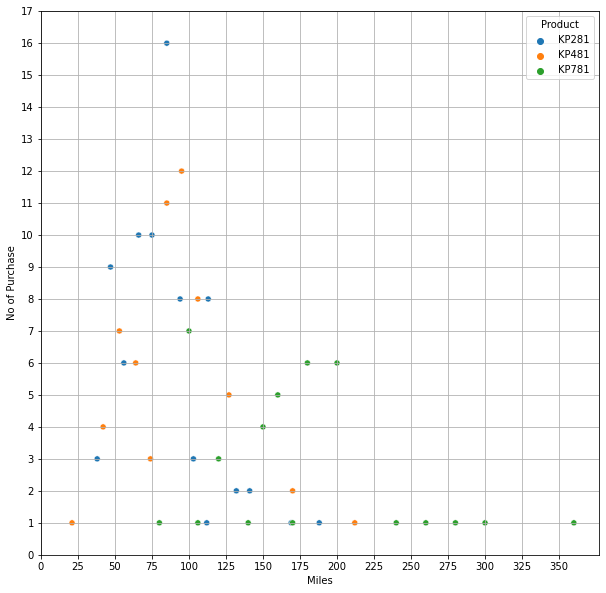

In [61]:
# we groupby the Miles and product then count the frequency and plotted a scatterplot
plt.figure(figsize=(10,10))
k=sns.scatterplot(data=df.groupby(['Product','Miles']).size().reset_index().rename(columns={0:'values'}),
                  x='Miles',y='values',hue='Product')
k.set_xticks(range(0,375,25))
k.set_yticks(range(0,18,1))
plt.ylabel('No of Purchase')
plt.grid()
plt.show()

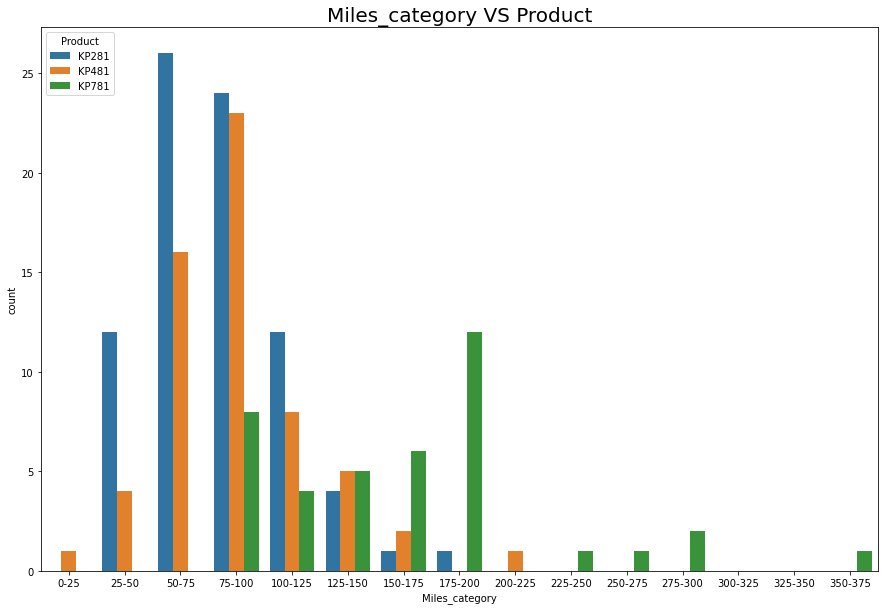

In [62]:
plt.figure(figsize=(15,10))
sns.countplot(data=Product_Miles,x='Miles_category',hue='Product')
plt.title('Miles_category VS Product',fontsize=20)
plt.show()

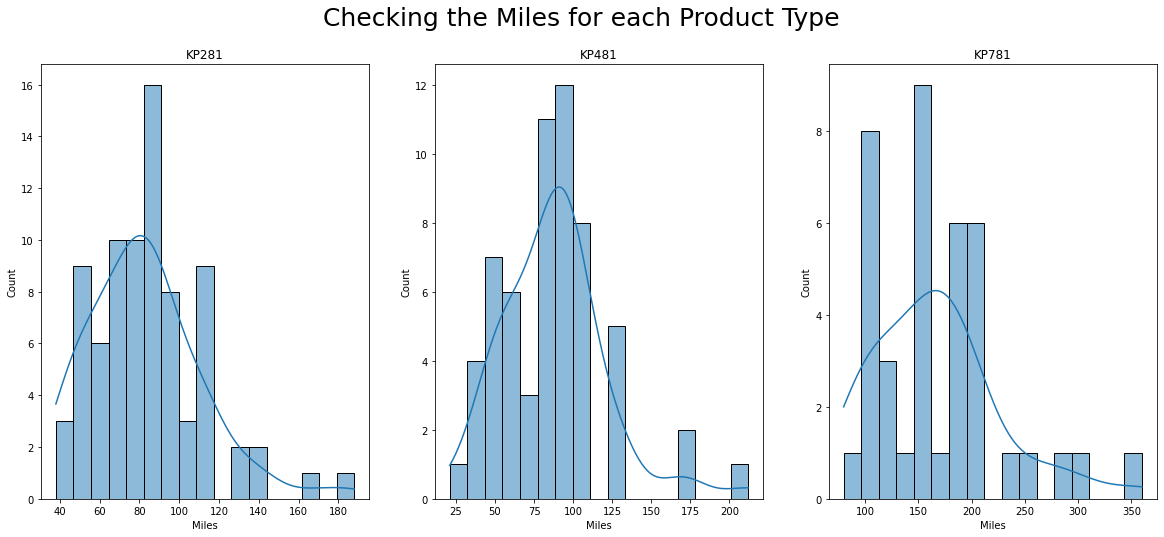

In [63]:
# plotting the histogram for each product for Miles
fig=plt.figure(figsize=(20,8))
k=1
for i in ['KP281','KP481','KP781']:
    plt.subplot(1,3,k)
    sns.histplot(df.loc[df['Product']==i]['Miles'],bins=int(17),kde=True)
    plt.title(i)
    k=k+1
fig.suptitle('Checking the Miles for each Product Type',fontsize=25)
plt.show()

Observation -
* KP 481 is preferred by customer expected to running miles in between(60-100)
* less tha but it depends upon the income also KP281 is also purchased in between(80-100)
* KP781 as it is an advance version so customer who are willing to running > 125 miles use this 

## Analyzation of Fitness with product

In [94]:
product_fitness_table=pd.crosstab(df['Fitness'],df['Product'],margins=True,normalize='all')
product_fitness_table

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.005556,0.005556,0.000000,0.011111
2,0.077778,0.066667,0.000000,0.144444
3,0.300000,0.216667,0.022222,0.538889
4,0.050000,0.044444,0.038889,0.133333
5,0.011111,0.000000,0.161111,0.172222
All,0.444444,0.333333,0.222222,1.000000


In [65]:
# calculating the Conditional Probability 
product_fitness_table['KP281|Fitness']=round(product_fitness_table['KP281']*100/product_fitness_table['All'],2)
product_fitness_table['KP481|Fitness']=round(product_fitness_table['KP481']*100/product_fitness_table['All'],2)
product_fitness_table['KP781|Fitness']=round(product_fitness_table['KP781']*100/product_fitness_table['All'],2)
product_fitness_table

Product,KP281,KP481,KP781,All,KP281|Fitness,KP481|Fitness,KP781|Fitness
Fitness,,,,,,,
1,1,1,0,2,50.00,50.00,0.00
2,14,12,0,26,53.85,46.15,0.00
3,54,39,4,97,55.67,40.21,4.12
4,9,8,7,24,37.50,33.33,29.17
5,2,0,29,31,6.45,0.00,93.55
All,80,60,40,180,44.44,33.33,22.22


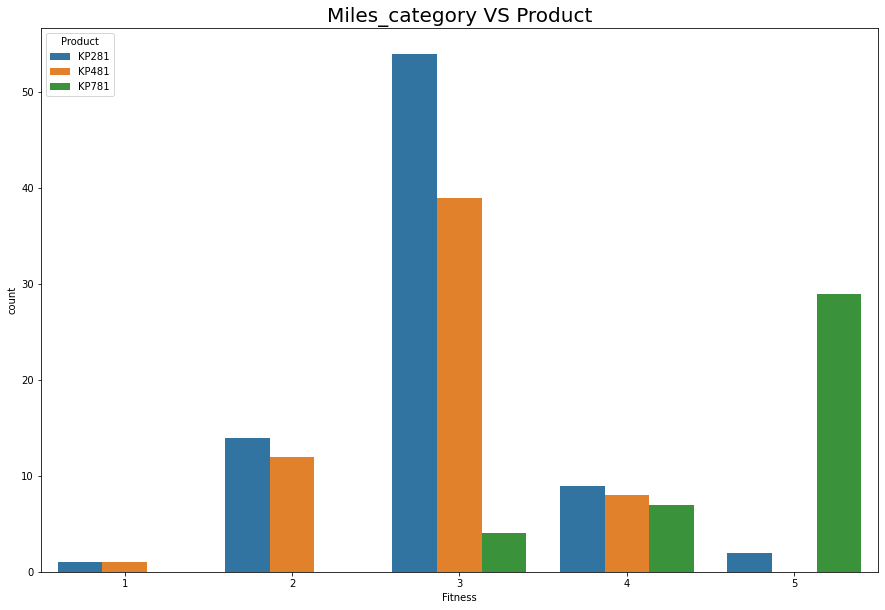

In [66]:
plt.figure(figsize=(15,10))
sns.countplot(data=df,x='Fitness',hue='Product')
plt.title('Miles_category VS Product',fontsize=20)
plt.show()

Observation:-
1. customer having fitness score of 3 are tend to buy the KP281,KP481
3. customer having fitness score of 5 are tend to buy the KP781.

## CCN Analysis

In [67]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income (in K)
0,KP281,18,Male,14,Single,3,4,29562,112,29.56
1,KP281,19,Male,15,Single,2,3,31836,75,31.84
2,KP281,19,Female,14,Partnered,4,3,30699,66,30.70
3,KP281,19,Male,12,Single,3,3,32973,85,32.97
4,KP281,20,Male,13,Partnered,4,2,35247,47,35.25
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,83.42
176,KP781,42,Male,18,Single,5,4,89641,200,89.64
177,KP781,45,Male,16,Single,5,5,90886,160,90.89
178,KP781,47,Male,18,Partnered,4,5,104581,120,104.58


In [68]:
male_df=df.loc[df['Gender']=="Male"]
male_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income (in K)
0,KP281,18,Male,14,Single,3,4,29562,112,29.56
1,KP281,19,Male,15,Single,2,3,31836,75,31.84
3,KP281,19,Male,12,Single,3,3,32973,85,32.97
4,KP281,20,Male,13,Partnered,4,2,35247,47,35.25
7,KP281,21,Male,13,Single,3,3,32973,85,32.97
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,83.42
176,KP781,42,Male,18,Single,5,4,89641,200,89.64
177,KP781,45,Male,16,Single,5,5,90886,160,90.89
178,KP781,47,Male,18,Partnered,4,5,104581,120,104.58


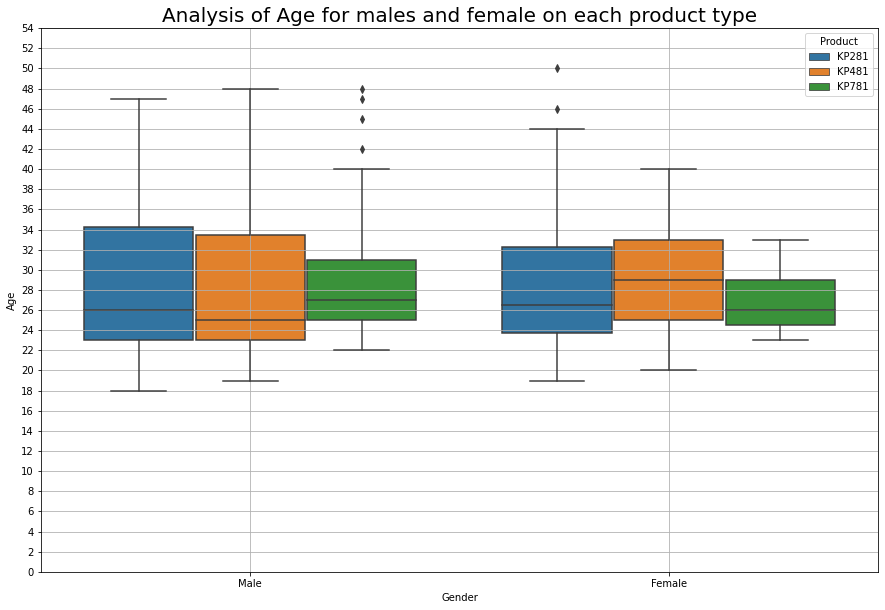

In [69]:
# Plotting the violin plot for Age with Product type and Gender category
plt.figure(figsize=(15,10))
q=sns.boxplot(data=df,y='Age',x='Gender',hue='Product')
q.set_yticks(range(0,55,2))
plt.title('Analysis of Age for males and female on each product type',fontsize=20)
plt.grid()
plt.show()

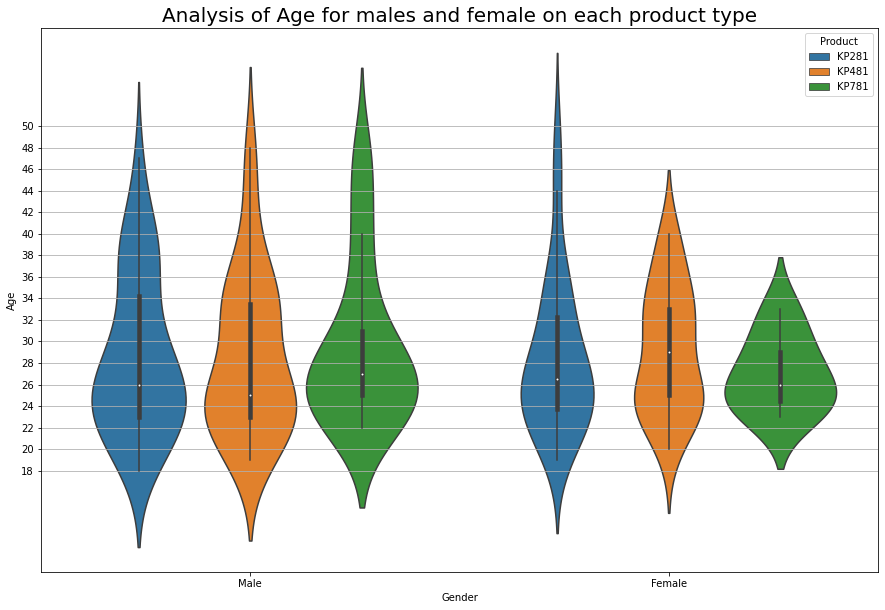

In [70]:
# Plotting the violin plot for Age with Product type and Gender category
plt.figure(figsize=(15,10))
q=sns.violinplot(data=df,y='Age',x='Gender',hue='Product')
q.set_yticks(range(18,52,2))
plt.title('Analysis of Age for males and female on each product type',fontsize=20)
plt.grid(axis='y')
plt.show()

Observation-:
1. Age 20-30:
      * Males= 24-26 has the higher chances for KP781
      * Females= 24-26 has the higher chances for KP781
2. 30-35:
      * Males,Females = has the higher chances for KP481
4. $>40$ there are higher chances of buying KP781,KP481 by males than females
5. Median age of males buying KP481 is less than Median age of female buying KP481

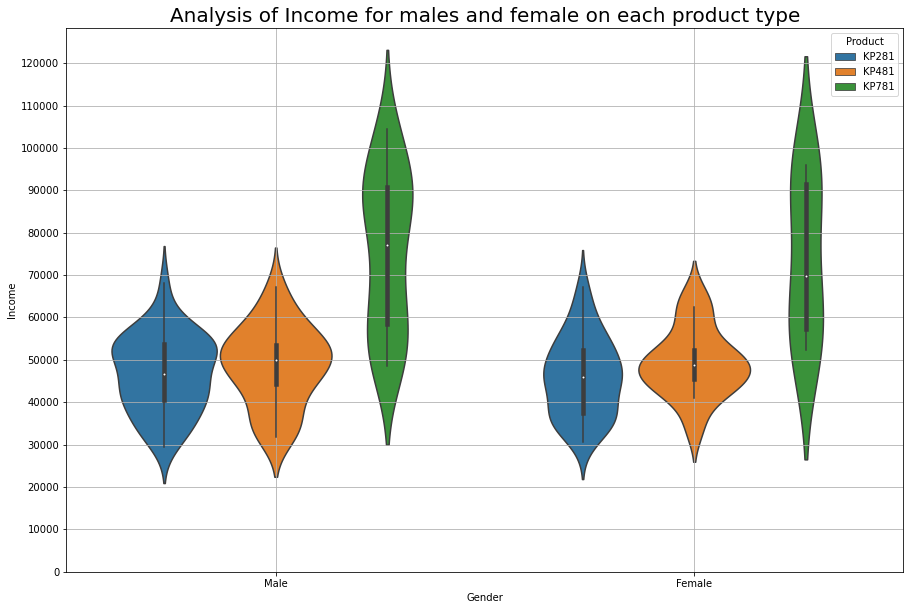

In [71]:
# Plotting the violin plot for Income with Product type and Gender category
plt.figure(figsize=(15,10))
q=sns.violinplot(data=df,y='Income',x='Gender',hue='Product')
q.set_yticks(range(0,130000,10000))
plt.title('Analysis of Income for males and female on each product type',fontsize=20)
plt.grid()
plt.show()

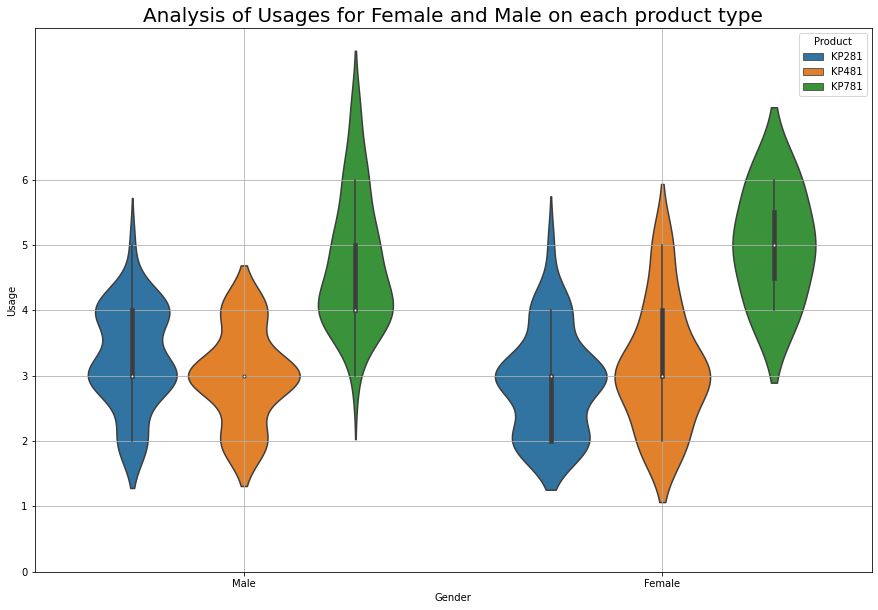

In [72]:
# Plotting the violin plot for IUsage with Product type and Gender category
plt.figure(figsize=(15,10))
q=sns.violinplot(data=df,y='Usage',x='Gender',hue='Product')
q.set_yticks(range(0,7,1))
plt.title('Analysis of Usages for Female and Male on each product type',fontsize=20)
plt.grid()
plt.show()

Observation=
1. There are more chances of Female having usage between 2-3 buying KP281,KP781 than males:
2. Males and Females having higher income and more than 4 usage are tend to buy KP781
3. Median use of Female is Higher than median use of males for KP781

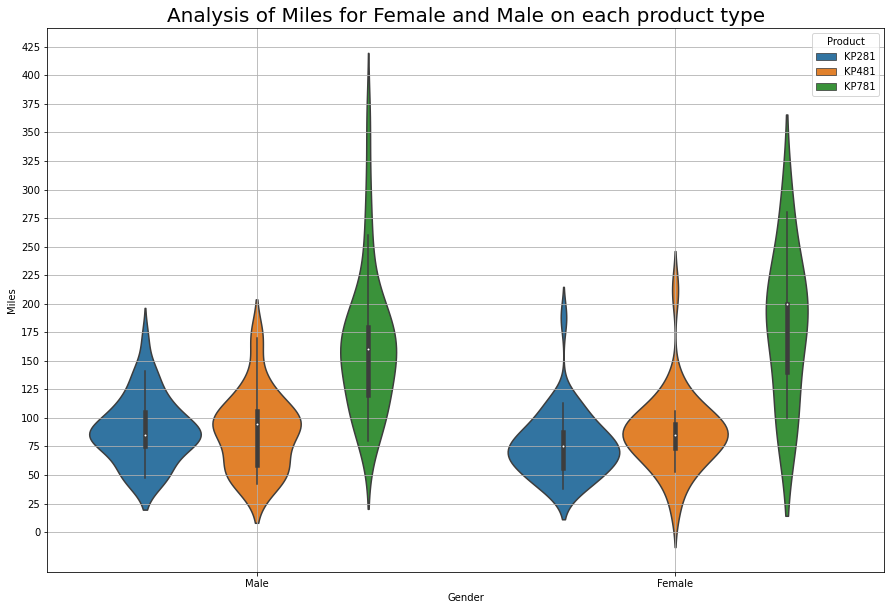

In [73]:
# Plotting the violin plot for Miles(Expected to run) with Product type and Gender category
plt.figure(figsize=(15,10))
q=sns.violinplot(data=df,y='Miles',x='Gender',hue='Product')
q.set_yticks(range(0,450,25))
plt.title('Analysis of Miles for Female and Male on each product type',fontsize=20)
plt.grid()
plt.show()

Observation:-
1. Median of expected Miles running is higher than males using KP781
2. For higher Miles use KP781

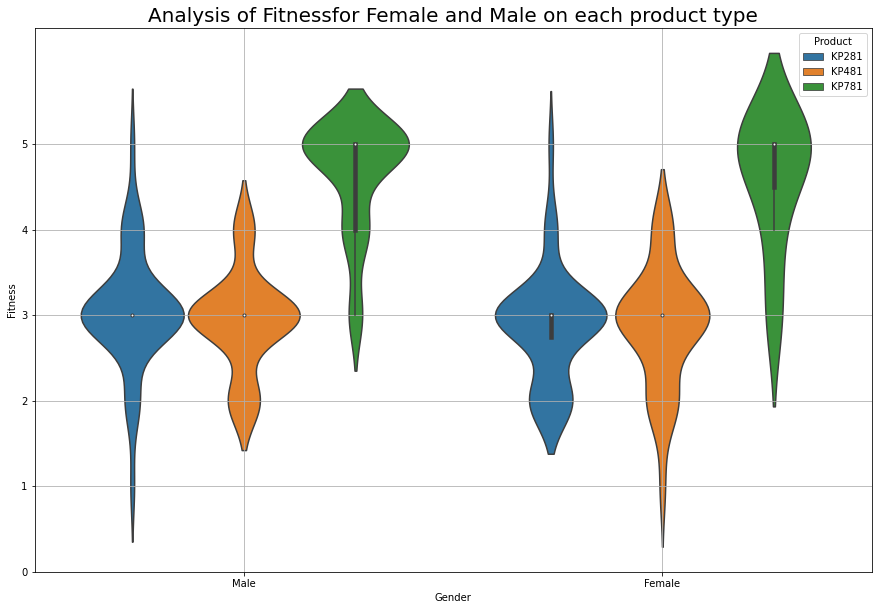

In [74]:
# Plotting the violin plot for IFitness with Product type and Gender category
plt.figure(figsize=(15,10))
q=sns.violinplot(data=df,y='Fitness',x='Gender',hue='Product')
q.set_yticks(range(0,6))
plt.title('Analysis of Fitnessfor Female and Male on each product type',fontsize=20)
plt.grid()
plt.show()

Observation:- 
1. Usage=5 > KP781
2. usages=3 > KP281,KP481

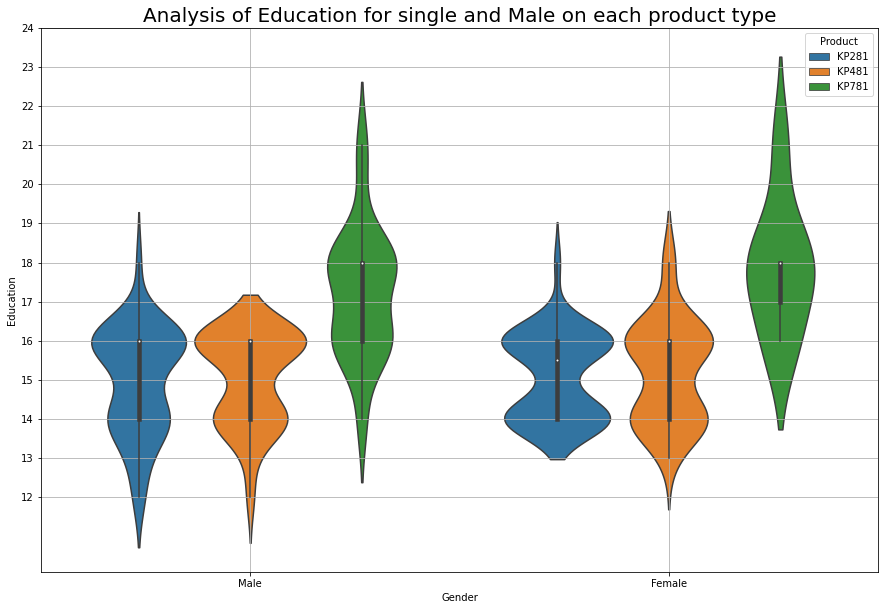

In [75]:
# Plotting the violin plot for Education with Product type and Gender category
plt.figure(figsize=(15,10))
q=sns.violinplot(data=df,y='Education',x='Gender',hue='Product')
q.set_yticks(range(12,25))
plt.title('Analysis of Education for single and Male on each product type',fontsize=20)
plt.grid()
plt.show()

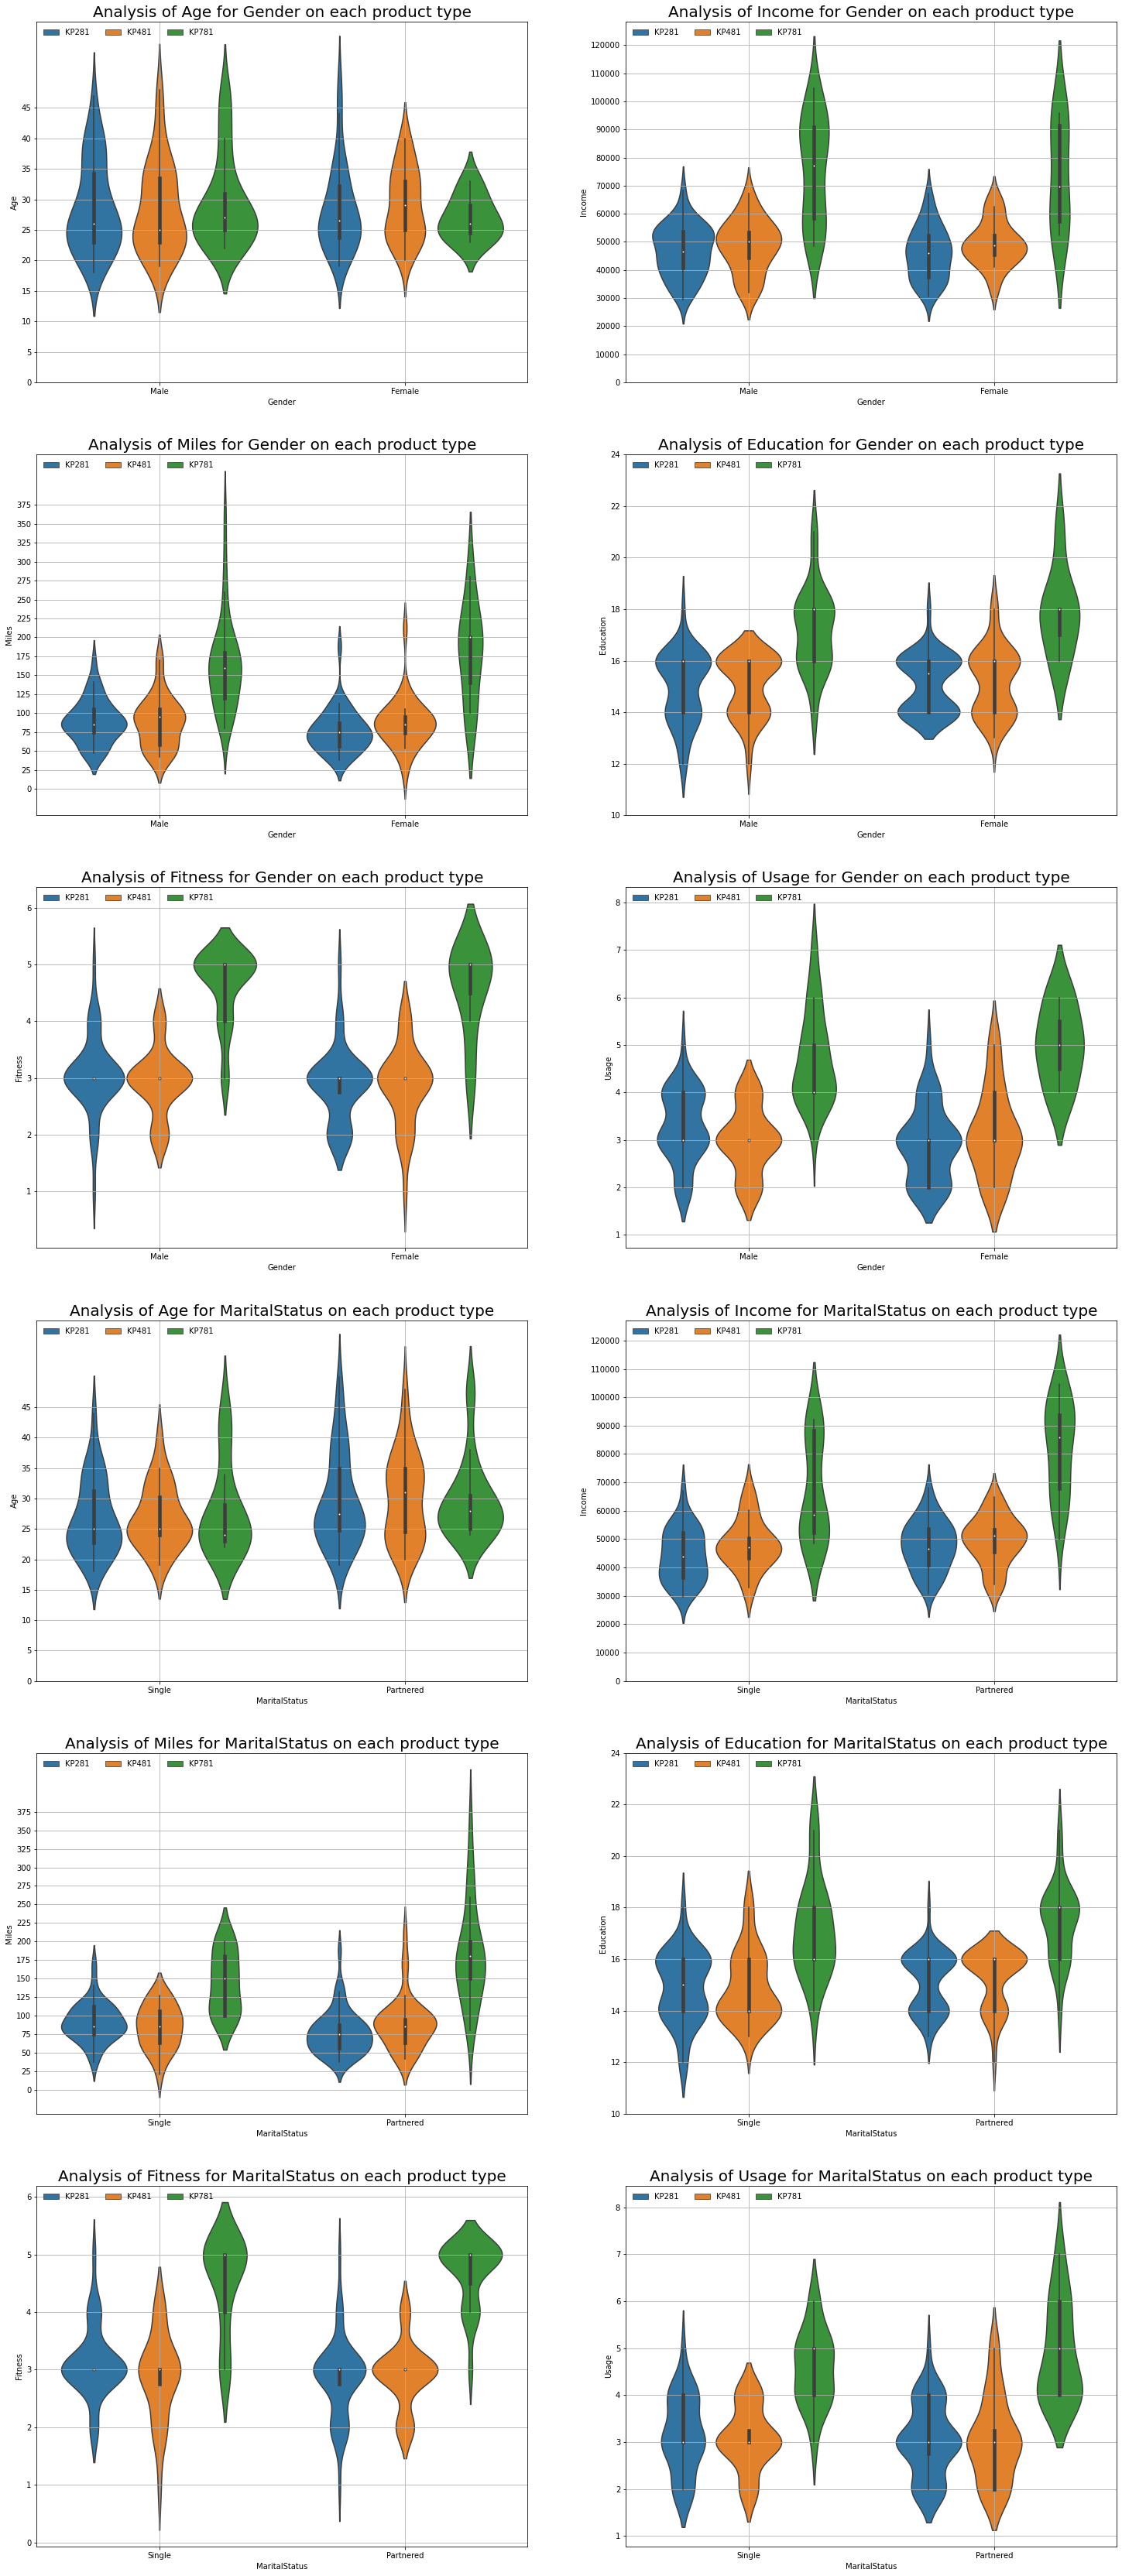

In [76]:
# Plotting the violin plots of each Numerical column i.e. ['Age','Income','Miles','Education','Fitness','Usage'] 
# with Gender, Marital Status Status and Product Type

fig=plt.figure(figsize=(25,60))
k=1
for m in ['Gender','MaritalStatus']:
      for i in ['Age','Income','Miles','Education','Fitness','Usage']:
            plt.subplot(6,2,k)
            q=sns.violinplot(data=df,y=i,x=m,hue='Product')
            plt.title(f'Analysis of {i} for {m} on each product type',fontsize=20)
            plt.legend(loc='upper left',frameon=False,ncol=3)
            k=k+1
            if i=='Age':
                  q.set_yticks(range(0,50,5))
            elif i=='Income':
                  q.set_yticks(range(0,130000,10000))
            elif i=='Miles':
                  q.set_yticks(range(0,400,25))
            elif i=='Education':
                  q.set_yticks(range(10,26,2))
            plt.grid()
plt.show()

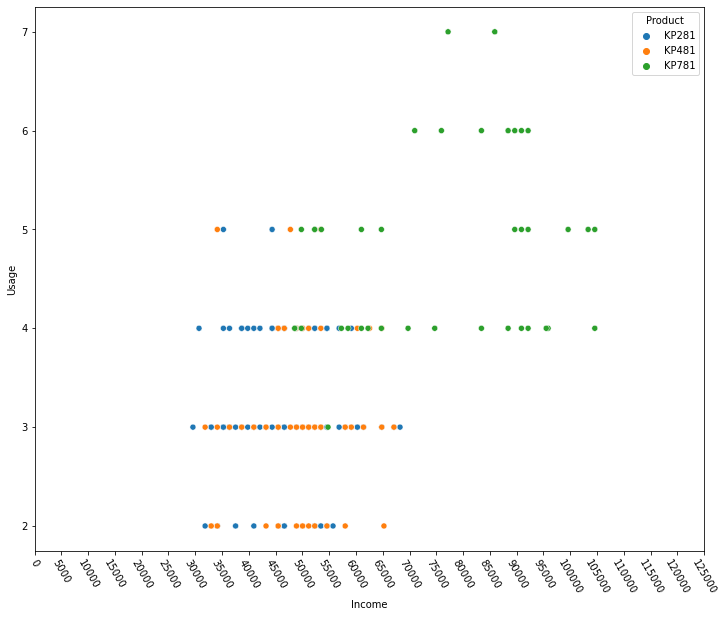

In [77]:
# plotting the scatter plot for customer usages with customer income with each product type
plt.figure(figsize=(12,10))
t=sns.scatterplot(data=df,y='Usage',x='Income',hue='Product')
t.set_xticks(range(0,130000,5000))
plt.xticks(rotation=300)
plt.show()

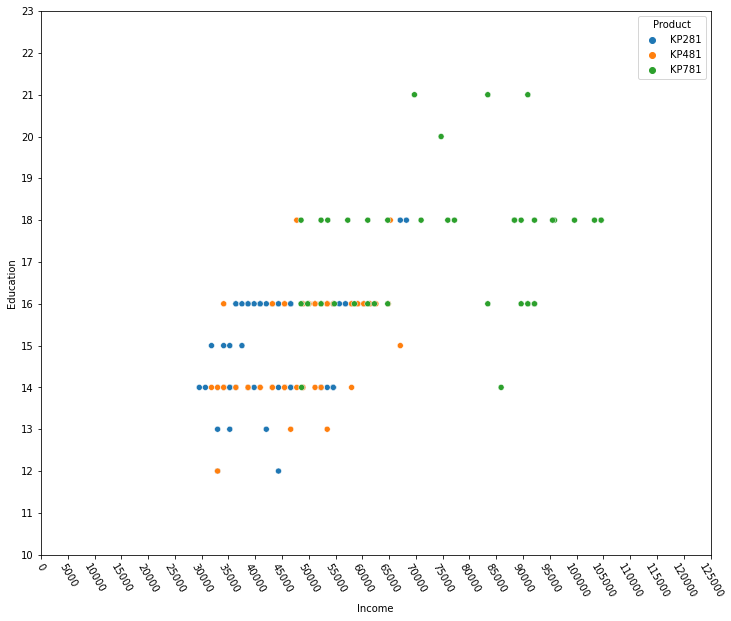

In [78]:
# plotting the scatter plot for customer Education with customer income with each product type
plt.figure(figsize=(12,10))
t=sns.scatterplot(data=df,y='Education',x='Income',hue='Product')
t.set_xticks(range(0,130000,5000))
t.set_yticks(range(10,24))
plt.xticks(rotation=300)
plt.show()

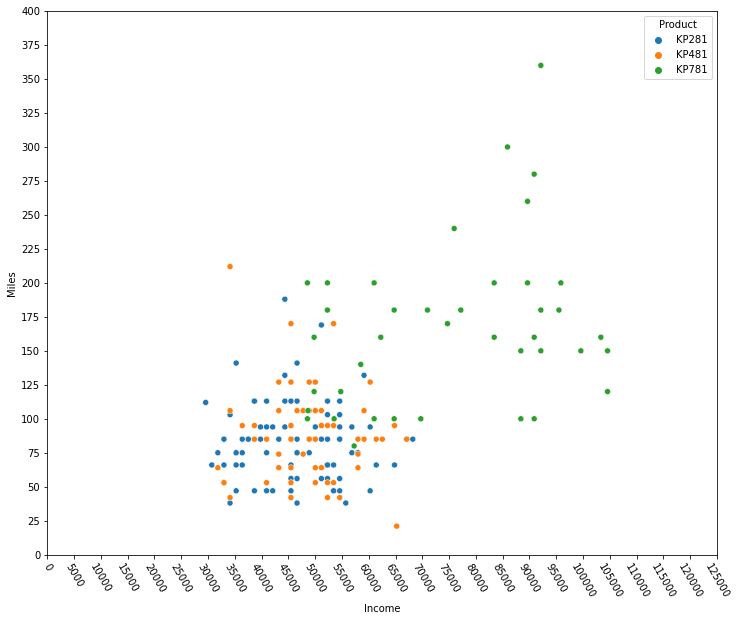

In [79]:
# plotting the scatter plot for customer Expectation of miles running with customer income with each product type
plt.figure(figsize=(12,10))
t=sns.scatterplot(data=df,y='Miles',x='Income',hue='Product')
t.set_xticks(range(0,130000,5000))
t.set_yticks(range(0,425,25))
plt.xticks(rotation=300)
plt.show()

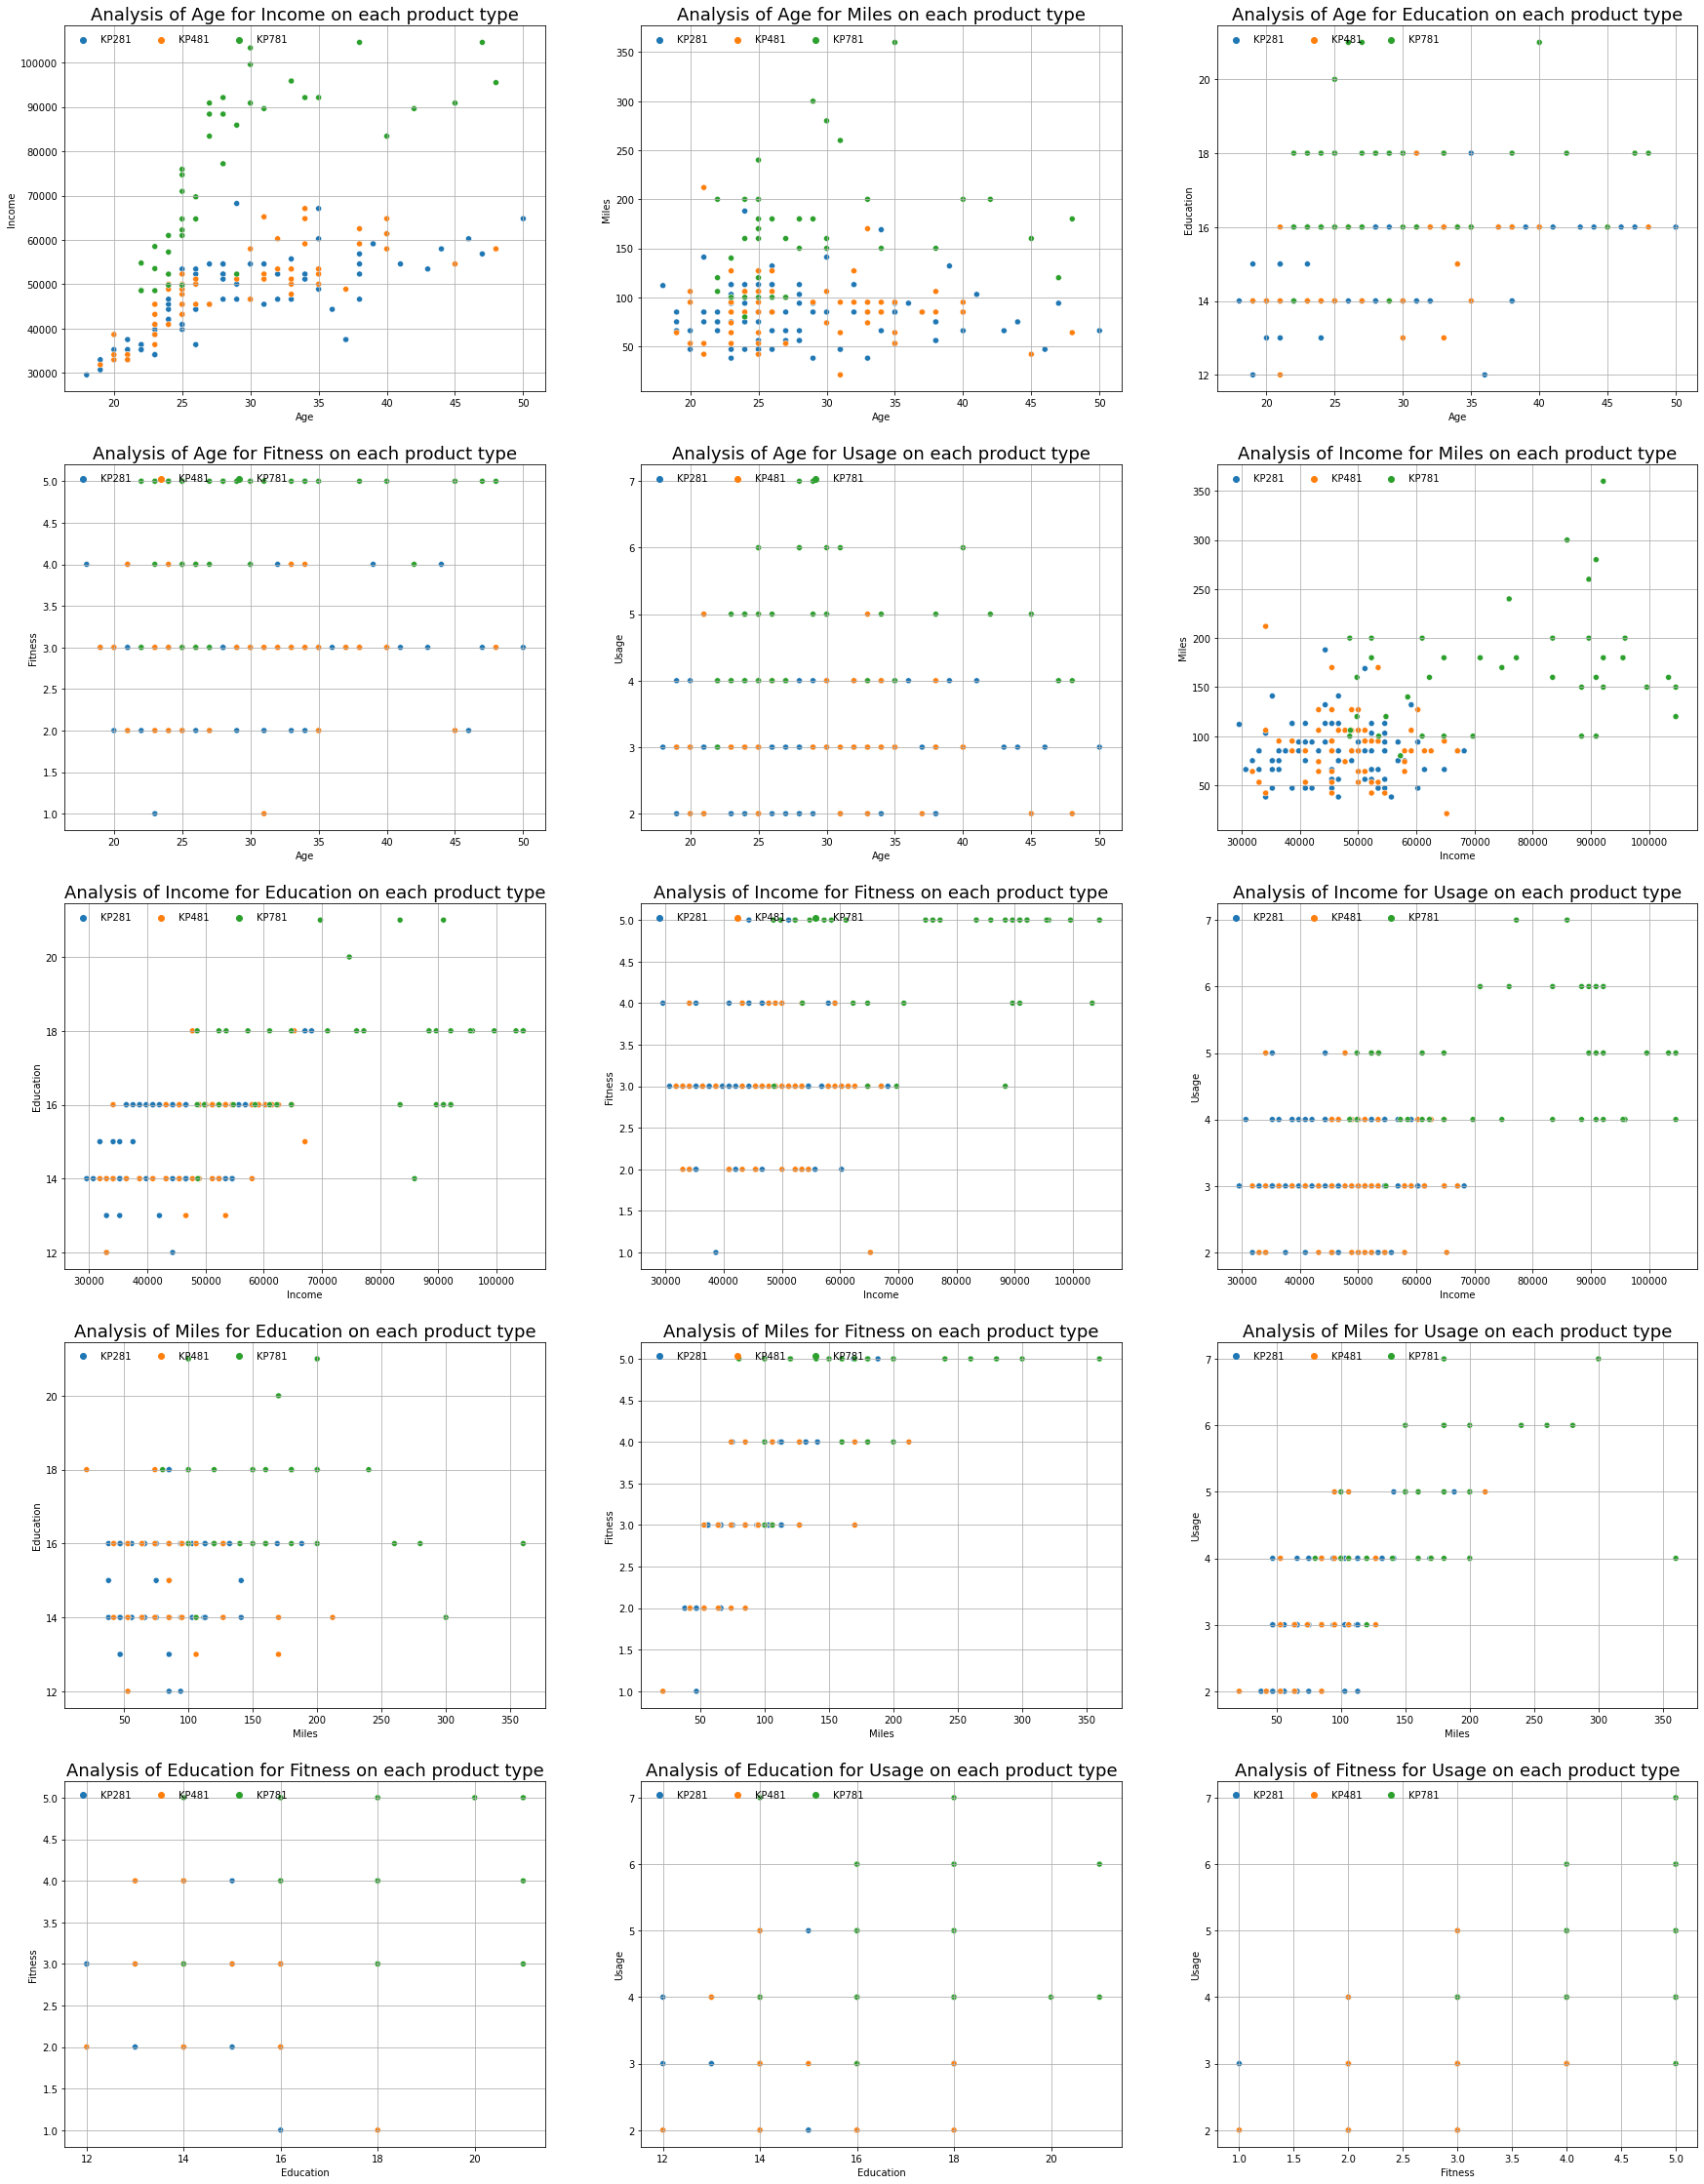

In [80]:
# Plotting the scatter plot of all numerical column with each other for each product type 
fig=plt.figure(figsize=(30,40))
k=1
numlist=['Age','Income','Miles','Education','Fitness','Usage']
for i in range(0,6):
            for j in range(i+1,len(numlist)):
                  plt.subplot(5,3,k)
                  q=sns.scatterplot(data=df,x=numlist[i],y=numlist[j],hue='Product')
                  plt.title(f'Analysis of {numlist[i]} for {numlist[j]} on each product type',fontsize=18)
                  plt.legend(loc='upper left',frameon=False,ncol=3)
                  k=k+1
                  if (i) =='Age':
                        q.set_xticks(range(0,50,5))
                  plt.grid()
plt.show()

In [81]:
# getting the correlation with each numerical with each other
df.corr()

,Age,Education,Usage,Fitness,Income,Miles,Income (in K)
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618,0.513406
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284,0.625823
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130,0.519548
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702,0.535007
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473,1.000000
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000,0.543476
Income (in K),0.513406,0.625823,0.519548,0.535007,1.000000,0.543476,1.000000


<AxesSubplot:>

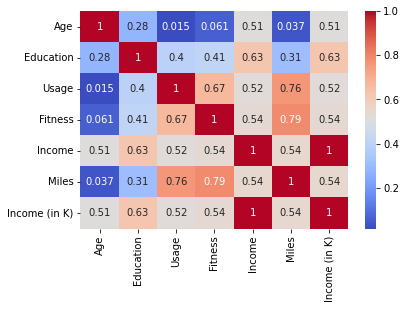

In [82]:
# Plotting the heatmap 
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [87]:
df_new=pd.get_dummies(df,columns=['Product'])
df_new

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income (in K),Product_KP281,Product_KP481,Product_KP781
0,18,Male,14,Single,3,4,29562,112,29.56,1,0,0
1,19,Male,15,Single,2,3,31836,75,31.84,1,0,0
2,19,Female,14,Partnered,4,3,30699,66,30.70,1,0,0
3,19,Male,12,Single,3,3,32973,85,32.97,1,0,0
4,20,Male,13,Partnered,4,2,35247,47,35.25,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
175,40,Male,21,Single,6,5,83416,200,83.42,0,0,1
176,42,Male,18,Single,5,4,89641,200,89.64,0,0,1
177,45,Male,16,Single,5,5,90886,160,90.89,0,0,1
178,47,Male,18,Partnered,4,5,104581,120,104.58,0,0,1


<AxesSubplot:>

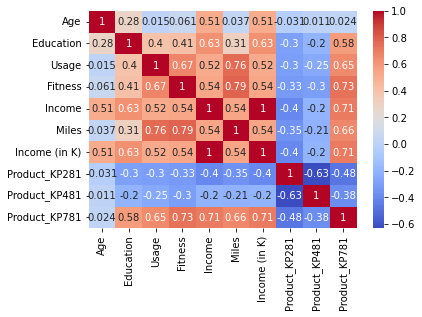

In [88]:
sns.heatmap(df_new.corr(),annot=True,cmap='coolwarm')

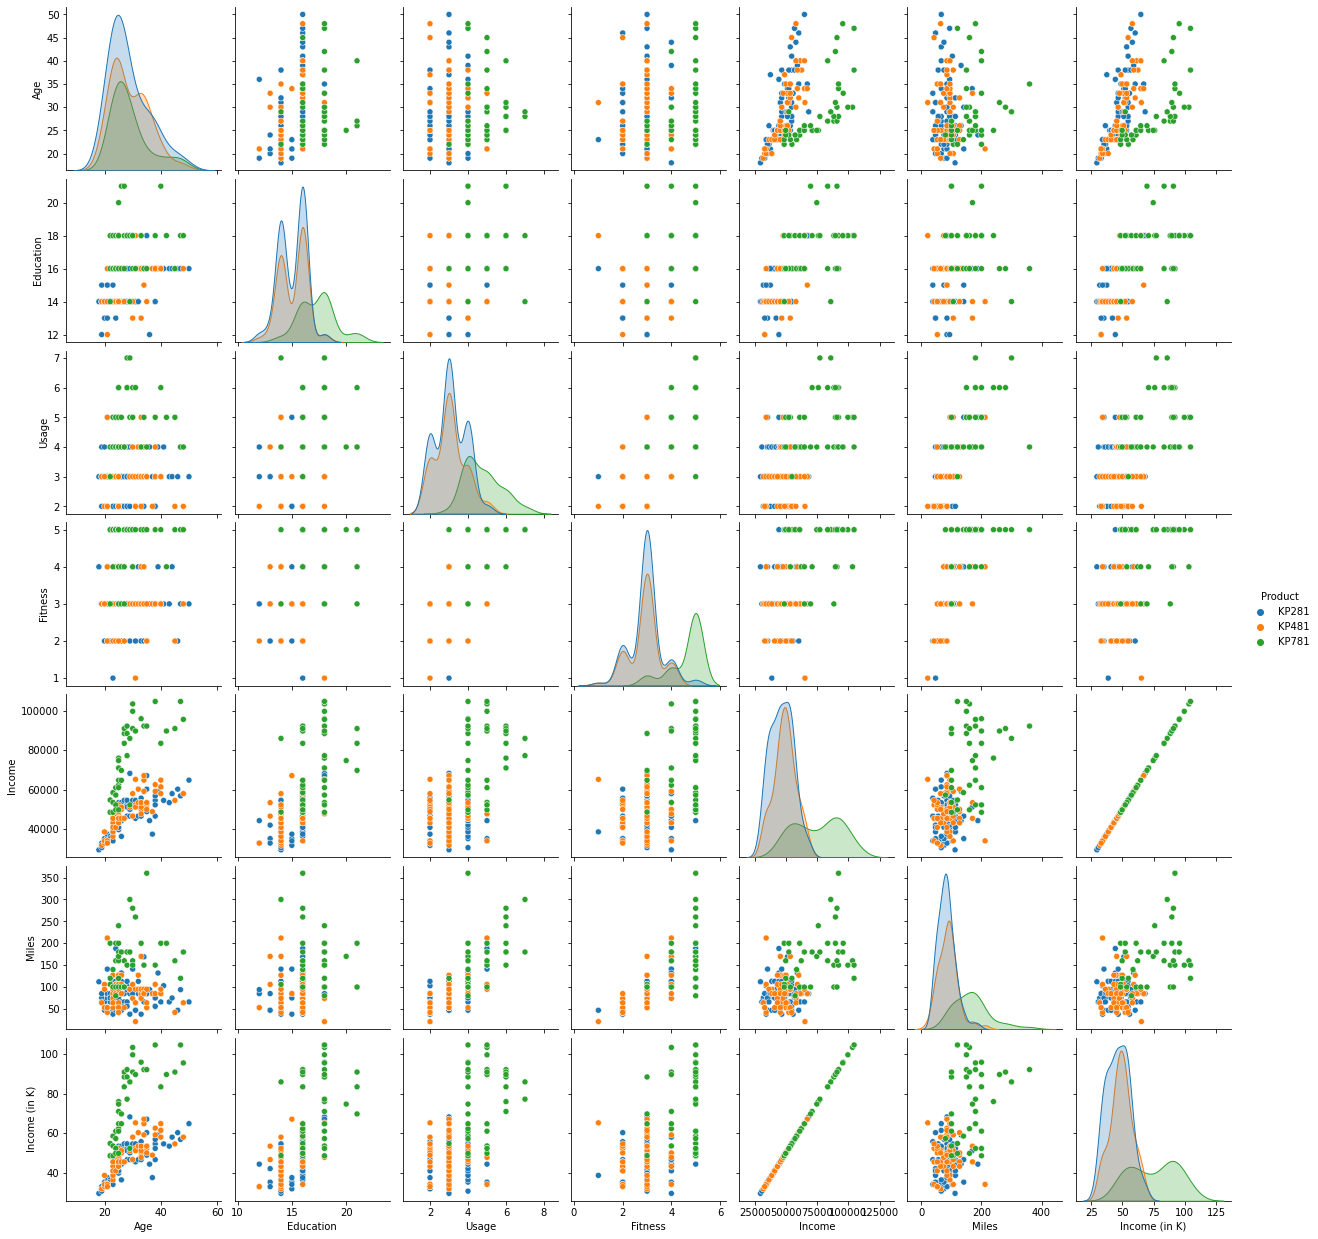

In [84]:
# Plotting the pair plot 
sns.pairplot(df,hue='Product')
plt.show()

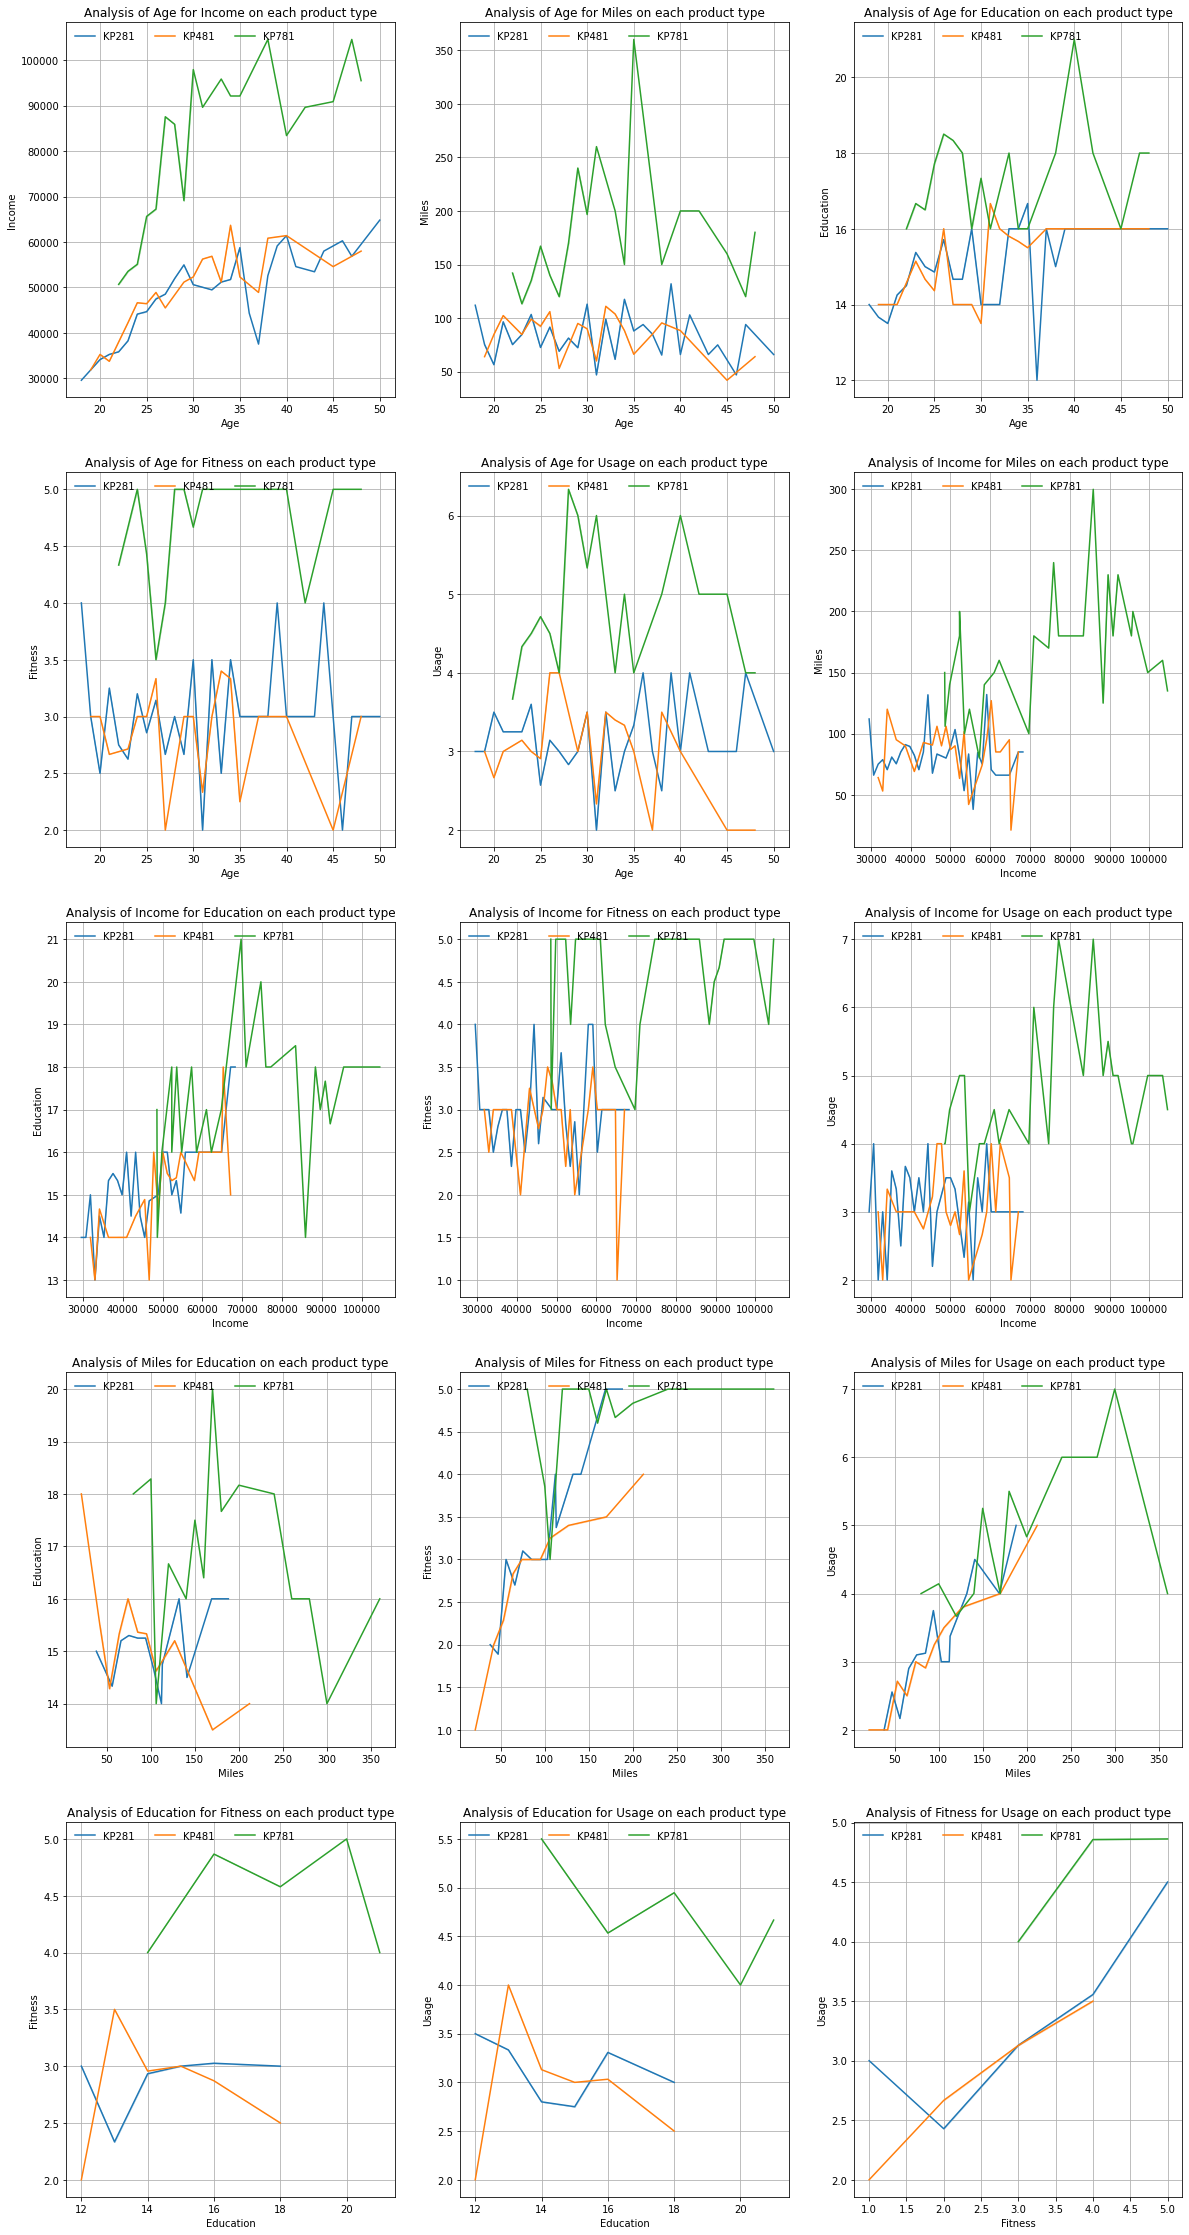

In [85]:
# Plotting the Lineplot of all numerical column with each other for each product type 
fig=plt.figure(figsize=(20,40))
k=1
numlist=['Age','Income','Miles','Education','Fitness','Usage']
for i in range(0,6):
            for j in range(i+1,len(numlist)):
                  plt.subplot(5,3,k)
                  q=sns.lineplot(data=df,x=numlist[i],y=numlist[j],hue='Product',ci=False)
                  plt.title(f'Analysis of {numlist[i]} for {numlist[j]} on each product type',fontsize=12)
                  plt.legend(loc='upper left',frameon=False,ncol=3)
                  k=k+1
                  if (i) =='Age':
                        q.set_xticks(range(0,50,5))
                  plt.grid()
plt.show()

Observations:-
1. Age-
      *  KP281 - Customer having age in between 20-30
      *  KP481 - Customer having age in between 30-35
      *  KP781 - Customer having age in between >40(outliers),25-30 
2. Income-
      *  KP281- customer having Income in between 30k-60k
      *  KP481- customer having Income in between 40k-60k
      *  KP781- customer having Income in greater > 60k
3. Education-
      *  KP281= customer having Education of 14 and 16 years
      *  KP281= customer having Education of 14 and 16 years
      *  KP781= customer having Education of 18 and more year
4. Usages-
      *  KP281= more preferred for usage 2-4
      *  KP481= more preferred for usage 2-3
      *  KP781= more preferred for usage more than 4
5. Miles-
      * KP 481 is preferred by customer expected to running miles in between(60-100)
      * less than but it depends upon the income also KP281 is also purchased in between(80-100)
      * KP781 as it is an advance version so customer who are willing to running > 125 miles use this
6. Fitness-
      * customer having fitness score of 3 are tend to buy the KP281,KP481
      * customer having fitness score of 5 are tend to buy the KP781.

7. Age_Gender - 
      * Age 20-30:
          * Males= 24-26 has the higher chances for KP781
          * Females= 24-26 has the higher chances for KP781
      * 30-35:
          * Males,Females = has the higher chances for KP481
      * $>40$ there are higher chances of buying KP781,KP481 by males than females
      * Median age of males buying KP481 is less than Median age of female buying KP481

8. Usages-Gender:-
      * There are more chances of Female having usage between 2-3 buying KP281,KP781 than males:
      * Males and Females having higher income and more than 4 usage are tend to buy KP781
      * Median use of Female is Higher than median use of males for KP781 

1. Age_Income:-
      * KP281= Age(20-25), income(30k-50k)
      * KP481= Age(30-35), Income(45k-60k)
      * KP781 =Age(20-70)- Income(>60k)
      
2. Age_Miles:-
      * KP281= Age(20-30), 50-100 Miles More preferred
      * KP481= Age(30-35), 50-100 Miles
      * KP781 =Age(25-30)- >125 miles
      * Age the age Increase people are tend to buy less KP781
3. Age_Education:-
      * KP281= Age(20-25), Education(14)
      * KP481= Age(35-50), Education(16)
      * KP781= Age(25-30), Education (16)
      * KP781= Age(All), Education(18)
3. Age_Fitness:-
      * KP281= Age(20-25), Fitness(3)
      * KP481= Age(35-50), Fitness(3)
      * KP781= Age(25-30), Fitness (5)
4. Age_Usgaes:-
      * KP281= Age(20-25), Usage(2-3)
      * KP481= Age(35-50), Usage(2-3)
      * KP781= Age(5-30), Usage(>4)
      


      Observation-:
1. KP281= more preferred for usage 2-4
1. KP481= more preferred for usage 2-3
1. KP781= more preferred for usage more than 4 
